# **Bike Sharing Demand Prediction**

**Table of content :**

1. Business Problem Understanding
2. Data Understanding
3. Exploratory Data Analysis
4. Data Preparation
5. Modeling
6. Conclusion and Recommendation
7. Deployment

****

# **Business Understanding**

# Introduction

Bike-sharing systems are a new generation of traditional bike rentals where the whole process, from membership, rental, and return back, has become automatic. Through these systems, a user can easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, great interest exists in these systems due to their important role in traffic, environmental, and health issues.


Apart from interesting real-world applications of bike-sharing systems, the characteristics of data generated by these systems make them attractive for research. Unlike other transport services such as buses or subways, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike-sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected by monitoring these data.


# Problem and Objective

The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings.

# **Data Understanding**

<!-- * Jelaskan asal sumber data dan kapan data dibuat.
* Jelaskan data apa yang dimiliki, dan deskripsikan setiap kolom & baris nya merepresentasikan apa.
* Jelaskan bagaimana kaitan antara atribut/kolom dengan konteks bisnis.
* Jelaskan tipe variabel dari tiap atribut.
* Jelaskan value apa saja yang anda temui didalam dataset.
* Berikan statement apakah data anda telah capable untuk digunakan menjawab problem atau belum. -->

The obtained data consists of a two-year historical log corresponding to the years 2011 and 2012 from the Capital Bikeshare system in Washington D.C., USA. This data is publicly available at http://capitalbikeshare.com/system-data and includes hourly records with relevant weather and seasonal information, sourced from http://www.freemeteo.com.

**`FEATURES & TARGET`**

Short description of features and targets

| Features | Description |
|-|-|
| `dteday` | Rental date |
| `season` | Season (1: Winter, 2: Spring, 3: Summer, 4: Fall) |
| `hr` | Hour of day (0 to 23) |
| `holiday` | Holiday or not |
| `temp` | Normalized temperature in Celsius using MinMaxScaler (min=-8, max=39) |
| `atemp` | Normalized feeling temperature in Celsius using MinMaxScaler (min=-16, max=50) |
| `hum` | Normalized humidity (divided by 100) |
| `weathersit` | Weather situation |
| | 1: Clear, Few clouds, Partly cloudy, Partly cloudy |
| | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist |
| | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
| | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| `casual` | Count of bikes rented to casual users |
| `registered` | Count of bikes rented to registered users |

====================================================================================  

| Target | Description |
|-|-|
| `cnt` | Total number of bikes rented, including both casual and registered users |


**Load Libraries**

In [ ]:
# Install pycaret if dont have
# on local, suitable only python <= 3.11
# if using google colab just run this code, and restart kernel to activate it

pip install pycaret

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

color = sns.color_palette("tab10")
sns.set_style('darkgrid')

**Load Dataset**

In [ ]:
data = pd.read_csv("../data/data_bike_sharing.csv")

# data = pd.read_csv("/content/data_bike_sharing.csv")

print('Dataset Shape:',data.shape)
display(data.head())

Dataset Shape: (12165, 11)


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [ ]:
pd.DataFrame({
    'feature': data.columns.values,  # Column names
    'data_type': data.dtypes.values,  # Data types of columns
    'null_value(%)': data.isna().mean().values * 100,  # Percentage of null values in each column
    'neg_value(%)': [len(data[col][data[col] < 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],  # Percentage of negative values in numeric columns
    '0_value(%)': [len(data[col][data[col] == 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],  # Percentage of zero values in numeric columns
    'duplicate': data.duplicated().sum(),  # Number of duplicate rows
    'n_unique': data.nunique().values,  # Number of unique values in each column
    'sample_unique': [data[col].unique() for col in data.columns]  # Unique values in each column
}).round(3)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,dteday,object,0.0,0.0,0.000,0,731,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-3..."
1,hum,float64,0.0,0.0,0.115,0,89,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.9..."
2,weathersit,int64,0.0,0.0,0.000,0,4,"[1, 2, 3, 4]"
3,holiday,int64,0.0,0.0,97.024,0,2,"[0, 1]"
4,season,int64,0.0,0.0,0.000,0,4,"[4, 2, 3, 1]"
5,atemp,float64,0.0,0.0,0.008,0,65,"[0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515..."
6,temp,float64,0.0,0.0,0.000,0,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82..."
7,hr,int64,0.0,0.0,4.349,0,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21,..."
8,casual,int64,0.0,0.0,9.248,0,305,"[24, 2, 17, 19, 99, 6, 20, 13, 219, 1, 11, 9, ..."
9,registered,int64,0.0,0.0,0.115,0,742,"[226, 16, 90, 126, 758, 39, 196, 27, 5, 315, 2..."


`Insight`
- There are no missing, negative, or duplicate values in the dataset.

- Some features have values equal to 0.

- Some features have values ​​that have been normalized.

- The 'dteday' column is of datetime type.

- Except for one column, all other columns are of float or integer type.

- Some categorical fields are represented as integers, such as 'holiday', 'season', 'weathersit'.

Overall, the provided features meet the criteria for accurately illustrating the factors influencing bike sharing demand.

# **Exploratory Data Analysis (EDA)**

<!-- * Bagaimana bentuk distribusi data?
* Bagaimana korelasi data pada dataset?
* Bagaimana keterkaitan antara feature dengan target? Bisa lakukan analisis bivariate. -->

## Data Distribution

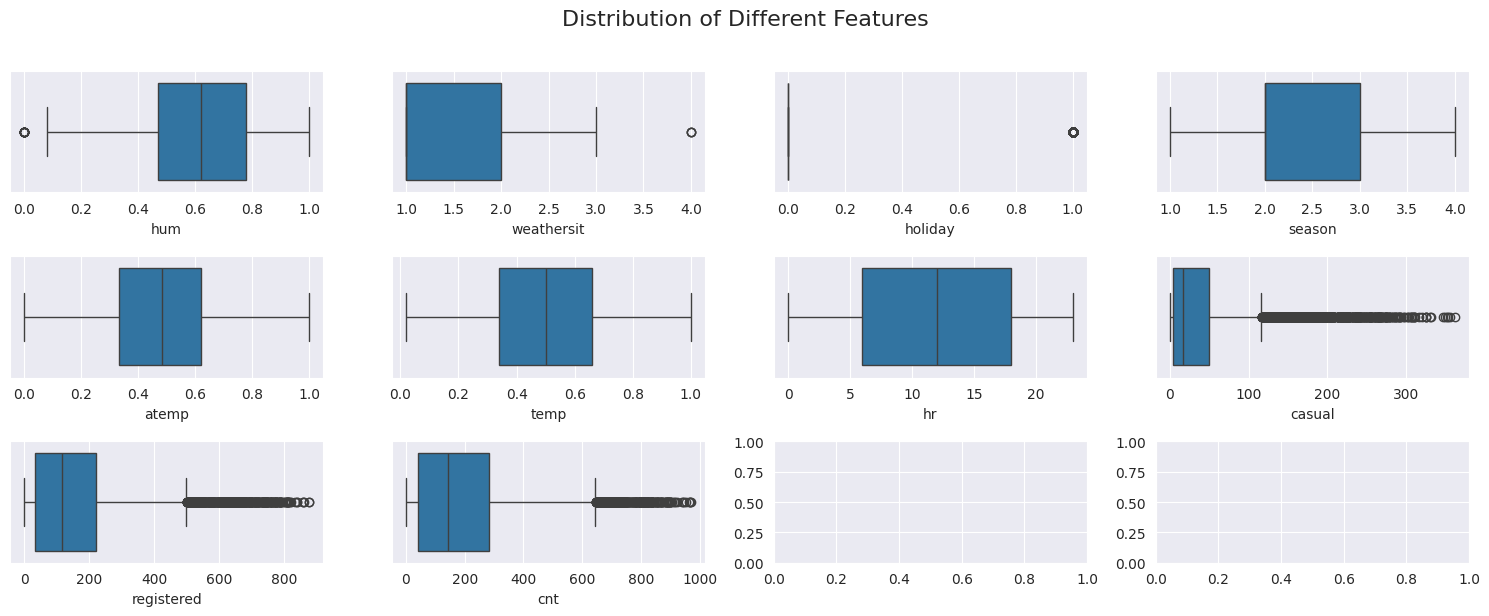

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 6))
axs = axs.flatten()

for i in range(1, len(data.columns)):
    sns.boxplot(x=data.columns[i], data=data, ax=axs[i-1], orient='v')

plt.suptitle('Distribution of Different Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

`Insight`

- Based on the boxplots, some features like 'hr', 'season', 'atemp', and 'temp' visually display a normal distribution.

- Apart from that, the majority of features exhibit a positive or right-skewed distribution with some outliers.

- Furthermore, outliers are noticeable in several features, including 'weathersit', 'hum', 'casual', 'registered', and 'cnt'.

**The Shapiro Normality Test**

In [ ]:
from scipy.stats import shapiro

dist = []

for i in range(1, len(data.columns)):
    feature_name = data.columns[i]
    stat, p_value = shapiro(data[feature_name])

    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', 'Shapiro-Wilk Statistic', 'P-value', 'Distributed'])
dist_df

,Feature,Shapiro-Wilk Statistic,P-value,Distributed
0,hum,0.980606,1.549126e-37,Not Normally Distributed
1,weathersit,0.655259,0.000000e+00,Not Normally Distributed
2,holiday,0.158186,0.000000e+00,Not Normally Distributed
3,season,0.859363,0.000000e+00,Not Normally Distributed
4,atemp,0.980240,8.102456e-38,Not Normally Distributed
5,temp,0.977577,9.572396e-40,Not Normally Distributed
6,hr,0.951073,0.000000e+00,Not Normally Distributed
7,casual,0.708062,0.000000e+00,Not Normally Distributed
8,registered,0.851740,0.000000e+00,Not Normally Distributed
9,cnt,0.874019,0.000000e+00,Not Normally Distributed


`Insight`

The Shapiro-Wilk normality test indicates that `none of the features exhibit a normal distribution`.

## Univariate Analysis

**Categorical Features**

Create dummy variables for visualization

In [ ]:
data['dteday'] = pd.to_datetime(data['dteday'])

data['weekday'] = data['dteday'].dt.weekday
data['day'] = data['dteday'].dt.day
data['month'] = data['dteday'].dt.month
data['year'] = data['dteday'].dt.year
data.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,weekday,day,month,year
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,4,9,12,2011
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,6,17,6,2012
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2,15,6,2011
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,5,31,3,2012
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,1,31,7,2012


| Features | Description |
|-|-|
| `hr` | Hour (0 s/d 23) |
| `weekday` | Day of week |

**Visualization of Each Feature**

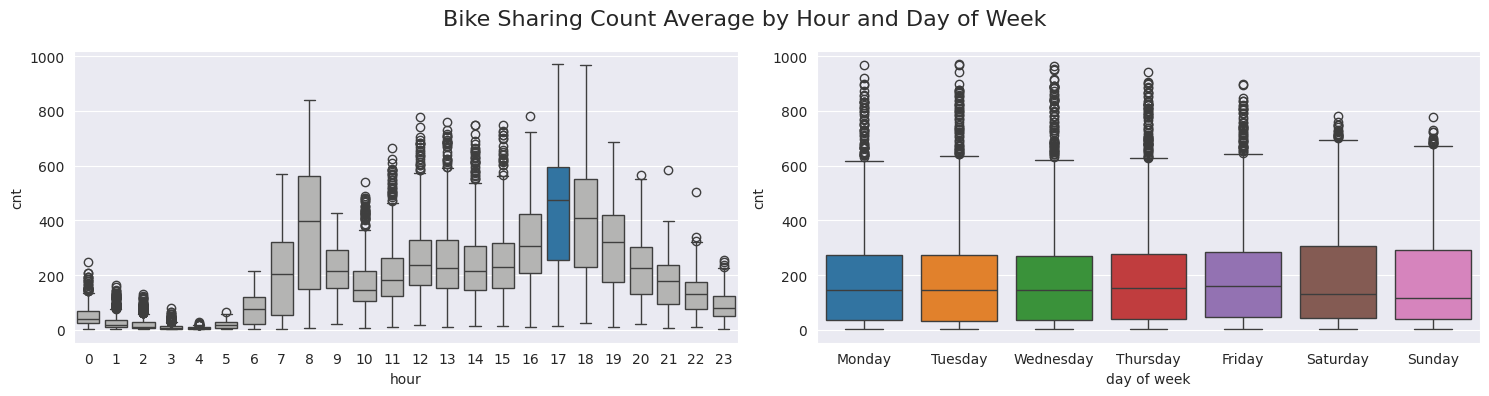

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,4))
sns.set_style('darkgrid')

max_pallete = ['#B4B4B3' if h != 17 else color[0] for h in data['hr'].sort_values().unique()]

sns.boxplot(data=data, x='hr', y='cnt', ax=axs[0], palette=max_pallete)
sns.boxplot(data=data, x='weekday', y='cnt', ax=axs[1], palette=color)

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axs[0].set_xlabel('hour')
axs[1].set_xticklabels(weekday)
axs[1].set_xlabel('day of week')

plt.suptitle('Bike Sharing Count Average by Hour and Day of Week', fontsize=16)
plt.tight_layout()
plt.show()

`Insight`

- Bike sharing start increasing from 6 AM and peak at 8 AM, reflecting a considerable number of people using bikes for commuting to work or school.

- The biggest increase occurred at 5 PM, possibly indicating people were returning from work.

- From midnight (0 AM) to early morning (4 AM), bike sharing are low, reflecting minimal activity during these hours.

- Bike sharing median show an increase on weekdays (Monday to Friday) and a decrease on weekends (Saturday and Sunday) but are not significant.

- There is a relatively high consistency in bike sharing on weekdays, indicating a similar bike usage routine for people on workdays.

| Features | Description |
|-|-|
| `month` | Month of year |
| `season` | Seasonal (1: Winter, 2: Spring, 3: Summer, 4: Fall) |
| `year` | Year |

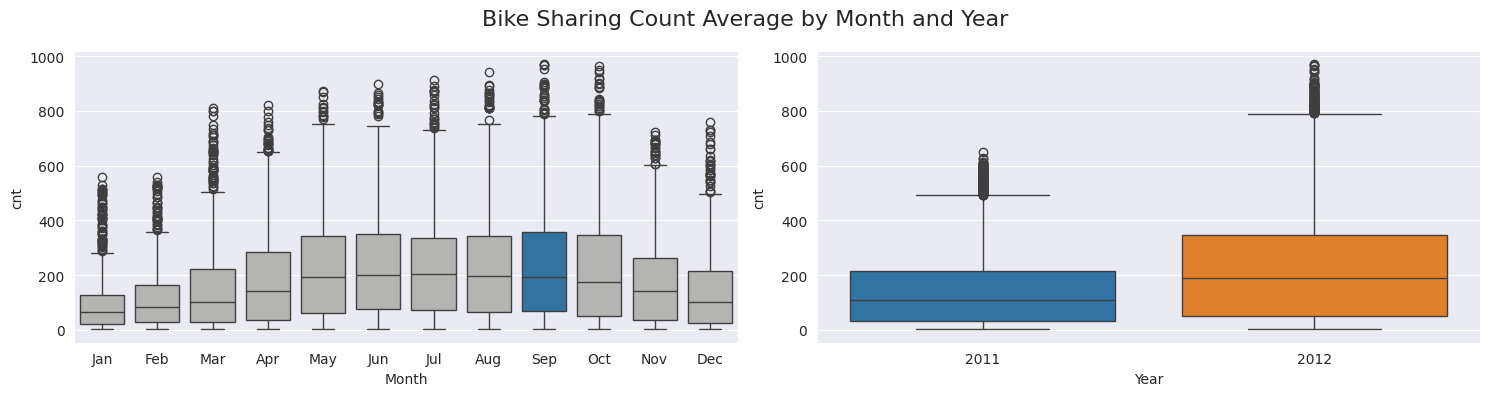

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
max_palette = ['#B4B4B3' if m != 9 else color[0] for m in data['dteday'].dt.month.sort_values().unique()]

sns.boxplot(data=data, x='month', y='cnt', ax=axs[0], palette=max_palette)
sns.boxplot(data=data, x='year', y='cnt', ax=axs[1], palette=color)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axs[0].set_xlabel('Month')
axs[0].set_xticklabels(month_order)
axs[1].set_xlabel('Year')

plt.suptitle('Bike Sharing Count Average by Month and Year', fontsize=16)
plt.tight_layout()
plt.show()


`Insight`

- Median bike sharing count start increasing in March and peak in September, reflecting a increase in bike usage during the summer and late summer seasons.

- Bike sharing significantly decrease during the winter months, especially from December to February, aligning with the expected decline due to colder weather.

- Apart from summer, bike sharing also show an increase during the spring months (March and April) and decrease during the fall months (October and November).

- The bike usage pattern underscores the significance of seasons in influencing people's decisions to bike.

- There is a significance increase in bike sharing from the year 2011 to 2012, indicating growth in the popularity of the bike-sharing system during that period.

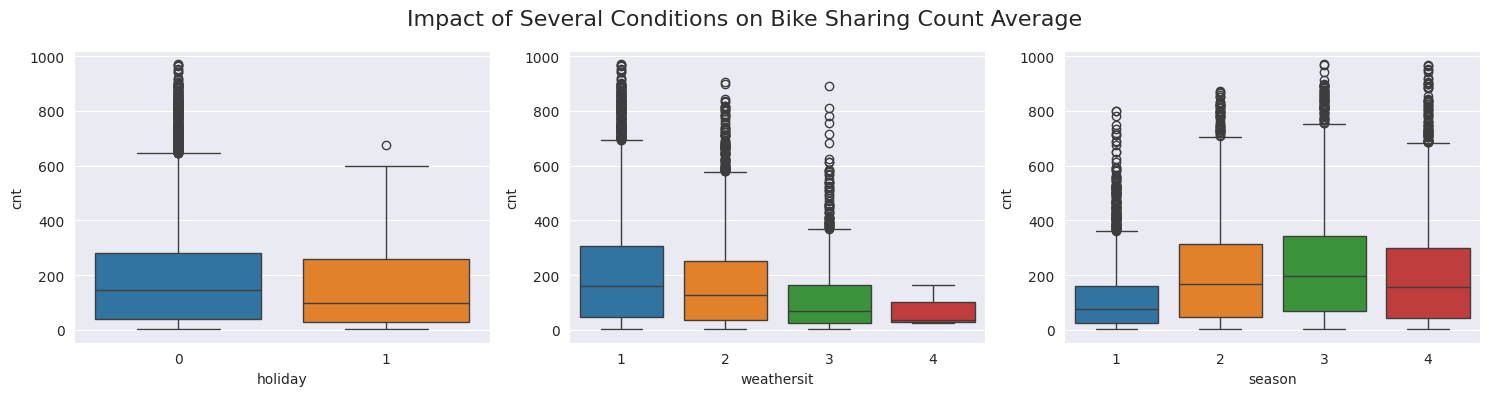

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))

sns.boxplot(data=data, x='holiday', y='cnt', ax=axs[0], palette=color)
sns.boxplot(data=data, x='weathersit', y='cnt', ax=axs[1], palette=color)
sns.boxplot(data=data, x='season', y='cnt', ax=axs[2], palette=color)


plt.suptitle('Impact of Several Conditions on Bike Sharing Count Average', fontsize=16)
plt.tight_layout()
plt.show()

| Features | Description |
|-|-|
| `weathersit` | Weather condition |
| | 1: Clear, Few clouds, Partly cloudy, Partly cloudy |
| | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist |
| | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
| | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| `holiday` | Whether it's a holiday or not |
| `season` | Season (1: Winter, 2: Spring, 3: Summer, 4: Fall) |

`Insight`

- Weather conditions greatly affect bicycle rental. Better weather conditions (code 1) correspond to the highest number of bicycle rentals.

- Poorer weather conditions, such as mist or cloudy weather (code 2), result in lower bike sharing.

- Extreme weather conditions, like heavy rain, ice pellets, thunderstorms, and thick fog (codes 3 and 4), have a significant impact on reducing bike sharing.

- This indicates that good and clear weather encourages people to use bikes more. This insight underscores the importance of weather analysis in the operational planning of bike-sharing systems.

- The number of bike sharing is lower on holidays (code 1) compared to regular days (code 0).

- Seasonal variations influence bike sharing. Summer (code 3) has the highest bike sharing, followed by fall (code 4), spring (code 2), and winter (code 1) with the lowest bike sharing.

**Numerical Features**

| Features | Description |
|-|-|
| `temp` | Normalized temperature in Celsius using MinMaxScaler (min=-8, max=39) |
| `atemp` | Normalized feeling temperature in Celsius using MinMaxScaler (min=-16, max=50) |
| `hum` | Normalized humidity (divided by 100) |
| `casual` | Count of bikes rented to casual users |
| `registered` | Count of bikes rented to registered users |

Convert to actual value to visualize data.

In [ ]:
temp_min, temp_max = -8, 39
atemp_min, atemp_max = -16, 50

original_atemp = data['atemp']*(atemp_max-atemp_min)+atemp_min
original_temp = data['temp']*(temp_max-temp_min)+temp_min
original_hum = data['hum']*100

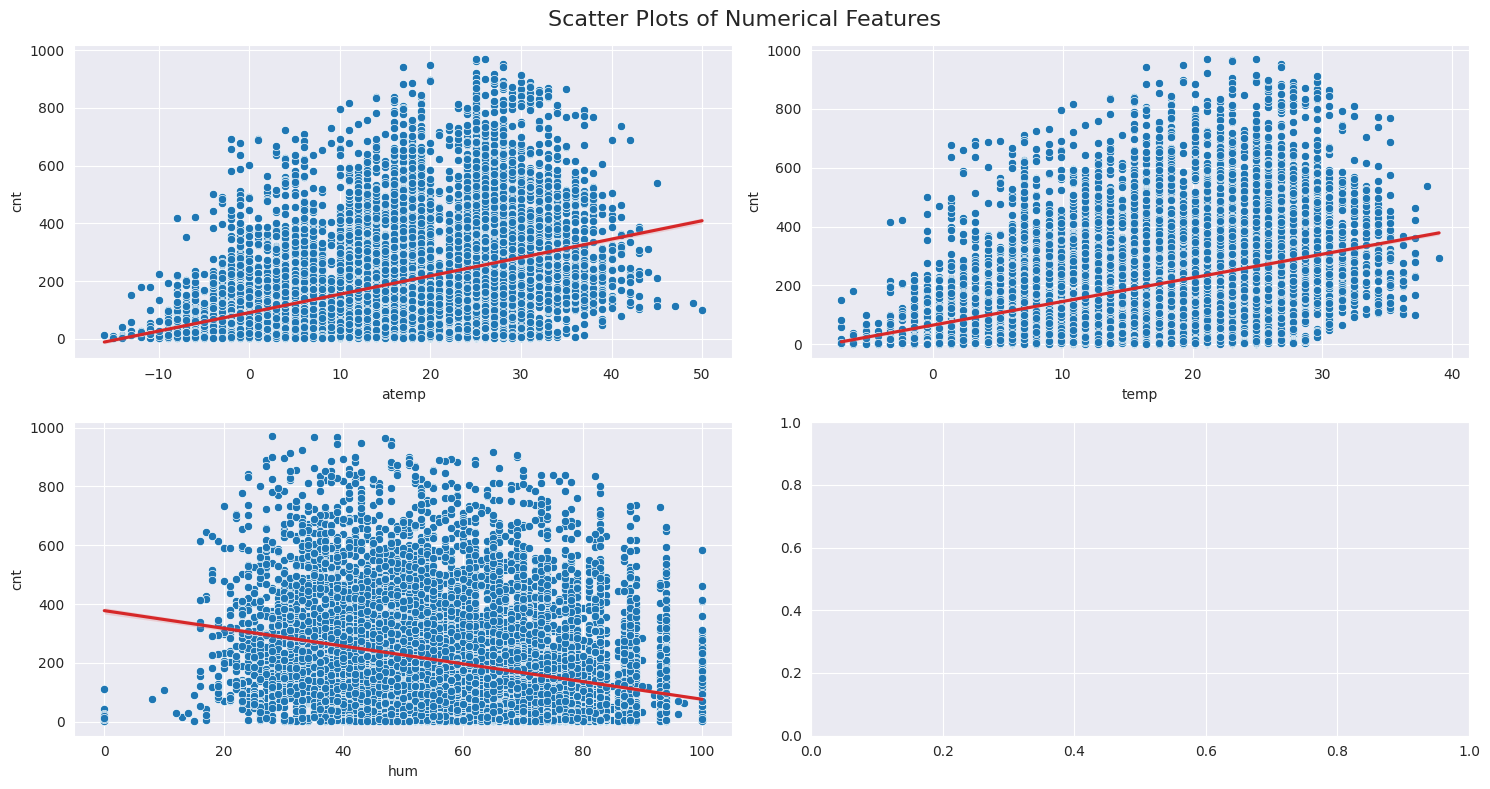

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,8))
axs.flatten()

sns.scatterplot(data=data, x=original_atemp, y='cnt', ax=axs[0,0])
sns.regplot(data=data, x=original_atemp, y='cnt', ax=axs[0, 0], scatter=False, color=color[3])

sns.scatterplot(data=data, x=original_temp, y='cnt', ax=axs[0,1])
sns.regplot(data=data, x=original_temp, y='cnt', ax=axs[0, 1], scatter=False, color=color[3])

sns.scatterplot(data=data, x=original_hum, y='cnt', ax=axs[1,0])
sns.regplot(data=data, x=original_hum, y='cnt', ax=axs[1, 0], scatter=False, color=color[3])

plt.suptitle('Scatter Plots of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

`Insight`

- The relationship 'temp' or 'atemp' features to 'cnt' has a positive linear pattern.

- Value 0 in 'hum' feature looks like an outlier because it is far from dominant.

- There is a negative linear relationship between 'hum' and 'cnt', where when the humidity level increases, the number of bicycle uses tends to decrease.

## Bivariate Analysis

**Hour and Weekday on Count**

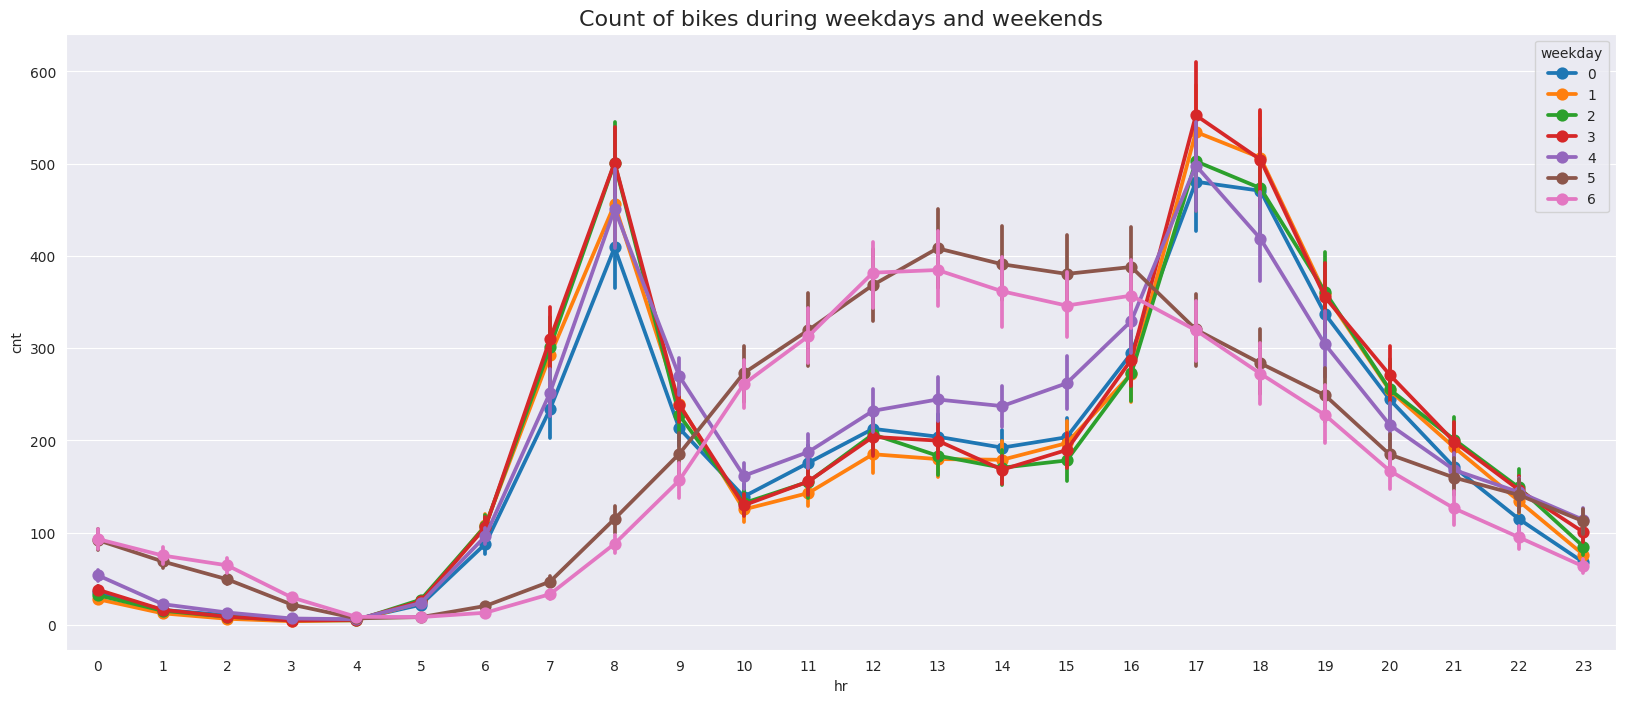

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.pointplot(data=data, x='hr', y='cnt', hue='weekday', palette=color, ax=ax)
plt.title('Count of bikes during weekdays and weekends', fontsize=16)
plt.show()

`Insight`

- A significant increase in bike sharing users during the hours of 6 - 8 am only occurs on weekdays Monday - Friday (Code 0 - 4) which indicates that people use bicycles to go to school or work.

- Likewise, at 16 - 18 pm there is a significant increase on weekdays (Monday - Friday) which is the time back from work.

- On weekends Saturday and Sunday (Code 5 and 6) there tends to be an increase during the day until it peaks at 13 noon.

**Hour and Weekday on Casual and Registered User**

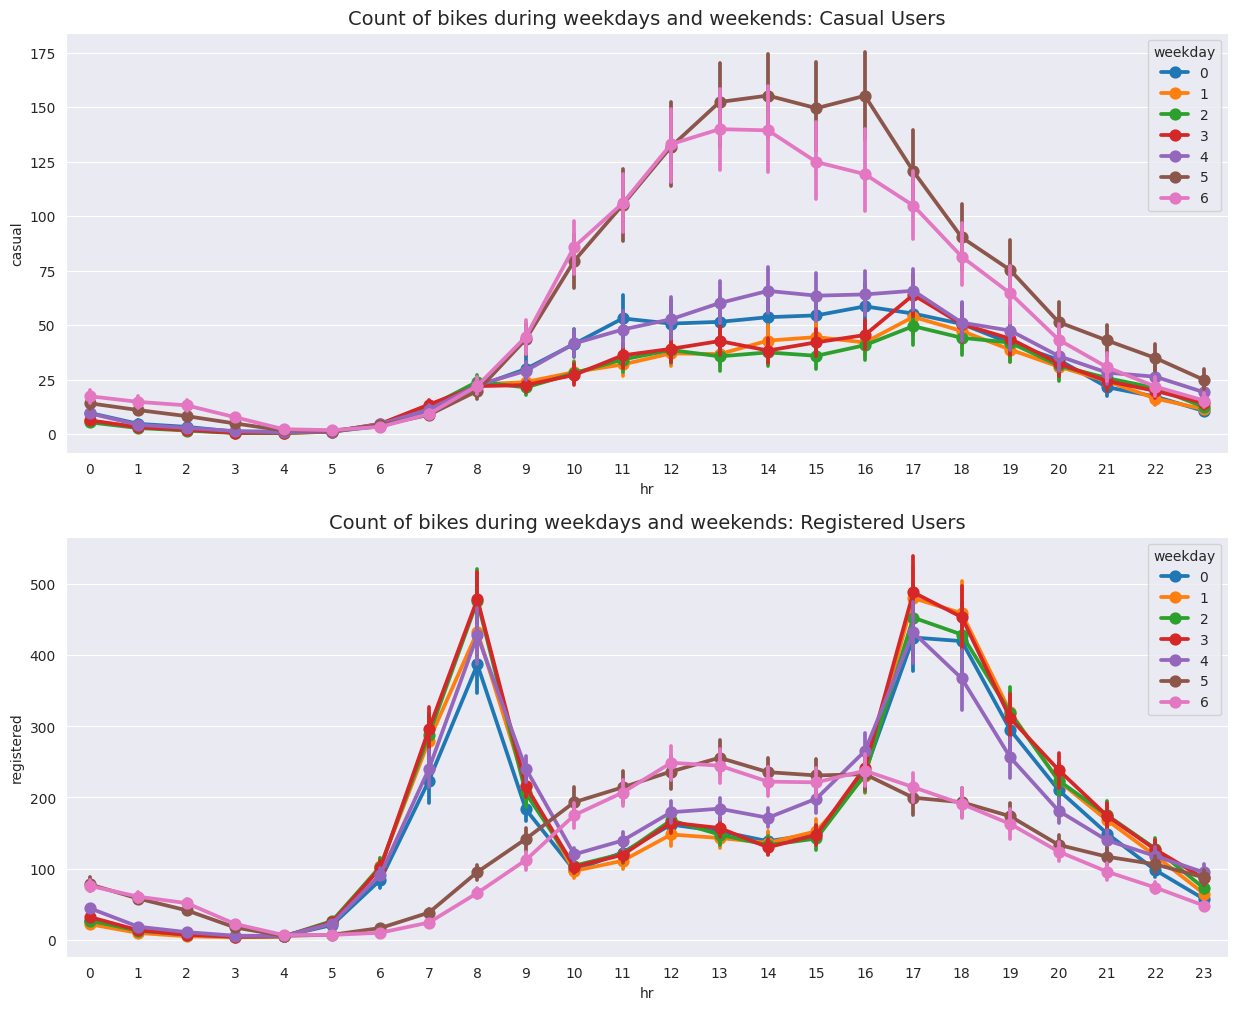

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
sns.pointplot(data=data, x='hr', y='casual', hue='weekday', palette=color, ax=axs[0])
sns.pointplot(data=data, x='hr', y='registered', hue='weekday', palette=color, ax=axs[1])

axs[0].set_title('Count of bikes during weekdays and weekends: Casual Users', fontsize=14)
axs[1].set_title('Count of bikes during weekdays and weekends: Registered Users', fontsize=14)

plt.show()

`Insight`

- Casual users use bicycles more on weekends (Saturday and Sunday) in the midday to afternoon.

- Registered users mostly use bicycles on weekdays (Monday - Friday) in the morning and evening, which indicates that users use bicycles for work.

## Data Correlation

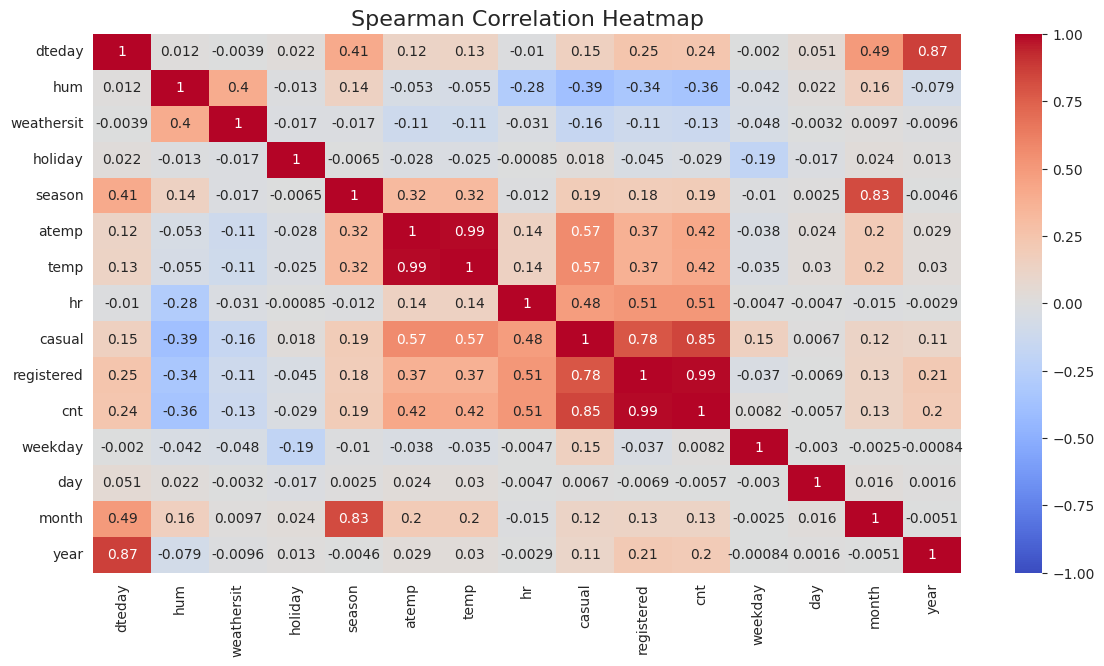

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr('spearman'), annot=True, vmin=-1, vmax=1, cmap='coolwarm', annot_kws={'size': 10})


plt.title('Spearman Correlation Heatmap', fontsize=16)
plt.show()

`Insight`

- The `'cnt'` feature is highly correlated with `'casual'` and `'registered'` since it is their sum, so these two features are dropped to avoid redundancy. The `'month'` and `'season'` features have a high correlation (0.83) but pass the multicollinearity threshold of 0.9. `'temp'` and `'atemp'` show strong multicollinearity (0.9); thus, one is dropped.

- The `'hr'` feature has a moderate positive correlation with `'cnt'`, indicating time-of-day influences bike rentals. Both `'temp'` and `'atemp'` moderately correlate with `'cnt'`, showing temperature impacts rentals, while `'hum'` negatively correlates, implying lower humidity favors biking. Features like `'year'`, `'season'`, `'month'`, and `'weathersit'` show weaker correlations, but weather conditions negatively impact counts. `'holiday'`, `'weekday'`, and `'day'` have minimal correlation, suggesting little influence on bike-sharing trends.

# **Data Preparation**

<!-- * Identifikasi dan kuantifikasi masalah yang ada dalam data seperti:
    1. Missing value
    2. Duplicated value
    3. Outlier
    4. Type data
    5. Column name
    6. Rare label
    7. Cardinality
    8. Collinearity
* Lakukan penanganan terhadap masalah data yang ditemukan.
* Lakukan feature engineering seperti:
    1. Encoding
    2. Scaling
    3. Feature creation
    4. Feature selection
* Buatlah pipeline dari tahap ini. -->

**Split Data Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split

# data= pd.read_csv("../data/data_bike_sharing.csv")
data = pd.read_csv("/content/data_bike_sharing.csv")
data['dteday'] = pd.to_datetime(data['dteday'])


df_seen, df_unseen = train_test_split(data, test_size=0.2, random_state=10)

## Identify Problem in the Dataset.

**Missing Value, Duplicate, and Negative Value**

In [ ]:
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'missing_value(%)': data.isna().mean().values * 100,
    'duplicate' : data.duplicated().sum(),
    'neg_value(%)': [len(data[col][data[col] < 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],
    'n_unique': data.nunique().values}
).round(3)

,feature,data_type,missing_value(%),duplicate,neg_value(%),n_unique
0,dteday,datetime64[ns],0.0,0,0.0,731
1,hum,float64,0.0,0,0.0,89
2,weathersit,int64,0.0,0,0.0,4
3,holiday,int64,0.0,0,0.0,2
4,season,int64,0.0,0,0.0,4
5,atemp,float64,0.0,0,0.0,65
6,temp,float64,0.0,0,0.0,50
7,hr,int64,0.0,0,0.0,24
8,casual,int64,0.0,0,0.0,305
9,registered,int64,0.0,0,0.0,742


`Insight`

- There are no missing, negative, or duplicate values in the dataset.

- The 'dteday' column is of datetime type. We can extract the date and time.

- Except for one column, all other columns are of float or integer type.

- Some categorical fields are represented as integers, such as 'holiday', 'season', 'weathersit'.

**Identifying Outlier**

In [ ]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in data.columns:
    if column in ['dteday', 'holiday']:
        continue
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,hum,14,0.12,0.00500,1.24500
1,weathersit,3,0.02,-0.50000,3.50000
2,season,0,0.00,0.50000,4.50000
3,atemp,0,0.00,-0.09855,1.05305
4,temp,0,0.00,-0.14000,1.14000
5,hr,0,0.00,-12.00000,36.00000
6,casual,847,6.96,-63.50000,116.50000
7,registered,470,3.86,-245.00000,499.00000
8,cnt,338,2.78,-323.00000,645.00000


`Insight`

- Features `'casual'` and `'registered'` show a number of significant outliers but this feature will be dropped because these features are part of the target variable which can result in redundancy.

- The target variable `'cnt'` also has significant outliers, to overcome this we will apply a logarithmic function which will also make the distribution close to normal.

**The image below is an illustration of the data distribution before and after handling outliers.**

In [ ]:
Q1 = data['cnt'].quantile(0.25)
Q3 = data['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data= data[(data['cnt'] >= lower_bound) & (data['cnt'] <= upper_bound)]
data['cnt']= np.log1p(data['cnt'])


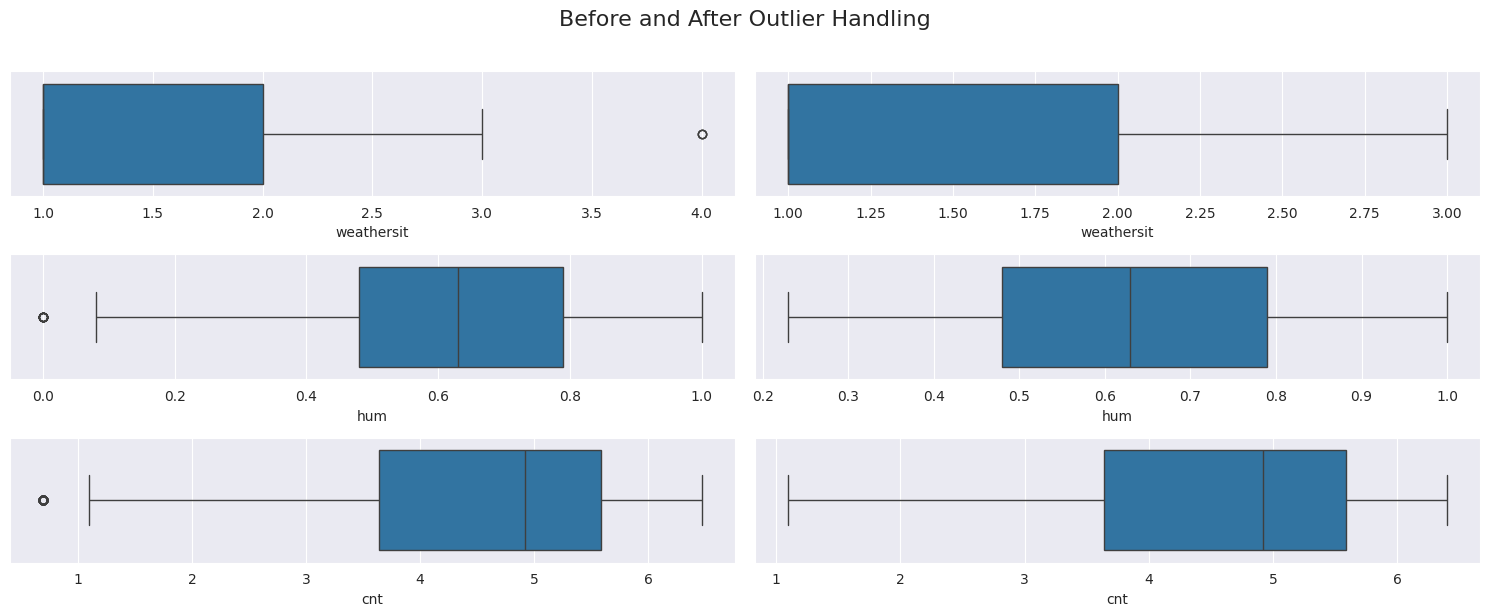

In [ ]:
from scipy.stats.mstats import winsorize

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 6))

cols = ['weathersit', 'hum', 'cnt']

for i in range(len(cols)):
    sns.boxplot(x=data[cols[i]], data=data, ax=axs[i,0], orient='v')
    if i < 3:
        sns.boxplot(x=winsorize(data[cols[i]], limits=(0.01, 0.01)), data=data, ax=axs[i,1], orient='v')
        axs[i, 1].set_xlabel(cols[i])
    else:
        sns.boxplot(x=np.log1p(data[cols[i]]), data=data, ax=axs[i,1], orient='v')

plt.suptitle('Before and After Outlier Handling', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

`Insight`

Overall outliers will be significantly reduced and will not eliminate the outlier effect.

## Handling the Problem

| Probelm | Feature | Action |
|-|-|-|
| Missing Value | None | None |
| Duplicated Value | None | None |
| Outlier | 'weathersit' | Winsorize with upper and lower bound of 1% |
| | 'hum' | Winsorize with upper and lower bound of 1% |
| | 'cnt' | Logarithmic Function (on Modeling) |
| Multicollinearity | 'atemp' | Drop the column because it can result in multicollinearity |
| Redudancy | 'casual', 'registered' | Drop the column because these features are part of the target variable which can result in redundancy.|

In [ ]:
from scipy.stats.mstats import winsorize
from pycaret.internal.preprocess.transformers import TransformerWrapper
from typing import Literal
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin

class HandlingOutliers(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        X['weathersit'] = winsorize(X['weathersit'], limits=(0.01, 0.01))
        X['hum'] = winsorize(X['hum'], limits=(0.01, 0.01))

        return X

    def set_output(self, transform: Literal['default', 'pandas']):
        return super().set_output(transform=transform)

## **Feature Engineering**

**Make Pipeline**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from pycaret.internal.preprocess.transformers import ExtractDateTimeFeatures
from sklearn.compose import ColumnTransformer
from mlxtend.feature_selection import ColumnSelector

outliers_handling = TransformerWrapper(
                    include=['weathersit', 'hum'],
                    transformer=HandlingOutliers())

extract_date = TransformerWrapper(
                include=['dteday'],
                transformer=ExtractDateTimeFeatures(
                    features=['day', 'month', 'year', 'weekday']))

selection = ColumnSelector(cols=['dteday_day', 'dteday_month', 'dteday_year', 'dteday_weekday', 'hr', 'holiday', 'season', 'weathersit', 'hum', 'temp'])

encoder = TransformerWrapper(
        include=['hr', 'dteday_day', 'dteday_month', 'dteday_year', 'dteday_weekday', 'season', 'weathersit'],
        transformer=OneHotEncoder(drop='first', handle_unknown='ignore'))

base_pipe = [
    ('extract date', extract_date),
    ('selection', selection),
    ('outlier handling', outliers_handling)
]

**What is used in the pipeline above:**

| Technique | Feature | Description |
|-|-|-|
| Winsorize | 'weathersit', 'hum', 'windspeed' | Winsorize is used to overcome outlier problems. This technique replaces outlier values ​​with previously determined upper bound or lower bound values. In this way, the data distribution becomes more controllable and less influenced by extreme values. |
| Feature Creation | 'dteday' | Feature creation is the process of creating new features from existing data, aimed at improving the quality of information in the dataset to support better analysis or predictions. Create new features such as day, date, month, year, by extracting from the 'dteday' feature. |
| Feature Drop | 'atemp', 'casual', 'registered | Feature selection by eliminating features that can cause multicollinearity and redundancy which can negatively affect model performance. |
| One-Hot Encoder | 'hr', 'dteday_day', 'dteday_month', 'dteday_year', 'dteday_weekday', 'season', 'weathersit' | One-Hot Encoder is a technique that converts categorical variables into binary vectors, allowing machine learning models to process categorical information effectively. This technique will be used in several distance-based models such as linear regression, ridge, lasso, SVR. |

# **Modeling Experiment**

<!-- * Atur environment untuk proses developing model ML, termasuk integrasi dengan pipeline data proprocessing.
* Lakukan proses berulang dari tahapan Benchmarking Model -> Hyperparameter Tunning -> Evaluating Model sampai diperoleh model terbaik. Anda bisa membuat banyak skenario eksperimen, misal:
    1. Perbandingan tanpa resampling vs dengan resampling
    2. Perbandingan antar set feature yang berbeda
    3. Perbandingan stand alone vs ensemble model
* Bandingkan performa antar kandidat model dari tiap skenario eksperimen yang telah dilakukan. Pilih kandidat terbaik sebagai final model.
* Lakukan evaluasi final model seperti:
    1. Learning curve (Overfitting atau underfitting)
    2. Residual analysis (Regression)
    3. ROC, PR Curve, Discriminant Threshold (Classification)
    4. Recursive Feature Elimination
    5. Time complexity
* Jawablah beberapa poin berikut:
    1. Bagaimana cara kerja final model?
    2. Apa limitasi dari final model?
    3. Kondisi data seperti apa kinerja model dapat dipercaya dan tidak dipercaya?
    4. Bagaimana interpretasi final model (feature importance, dll)?
* Gunakan final model untuk prediksi validation sets, dan berikan penjelasan.
* Lakukan proses finalisasi model, yaitu fitting ulang final model dengan seen data (training + validation set).
* Gunakan model untuk prediksi unseen data, dan berikan penjelasan.
* Lakukan analisis lanjutan dari hasil prediksi unseen data, misal analisis keuntungan, analisis kerugian, dll.  -->

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.linear_model import BayesianRidge

from pycaret.regression import *

**Setup Pycaret**

In [ ]:
RANDOM_SEED = 42
K_FOLDS = 5

configs = {
    'data': df_seen,
    'train_size':  0.8,
    'preprocess':  False,
    'session_id':  RANDOM_SEED,
    'fold':  K_FOLDS,
    'custom_pipeline': base_pipe,
    'n_jobs':  -1,
}

setup(
    target = 'cnt',
    **configs
    )

get_config('pipeline')

,Description,Value
0,Session id,42
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(9732, 11)"
4,Transformed data shape,"(9732, 11)"
5,Transformed train set shape,"(7785, 11)"
6,Transformed test set shape,"(1947, 11)"
7,Numeric features,9
8,Date features,1


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('extract date',
                 TransformerWrapper(transformer=TransformerWrapper(include=['dteday'],
                                                                   transformer=ExtractDateTimeFeatures(features=['day',
                                                                                                                 'month',
                                                                                                                 'year',
                                                                                                                 'weekday'])))),
                ('selection',
                 TransformerWrapper(transformer=ColumnSelector(cols=['dteday_day',
                                                                     'dteday_month',
                                                                     'dteday_year',
                                                                     'dteday_weekday',
                                                                     'hr',
                                                                     'holiday',
                                                                     'season',
                                                                     'weathersit',
                                                                     'hum',
                                                                     'temp']))),
                ('outlier handling',
                 TransformerWrapper(transformer=TransformerWrapper(include=['weathersit',
                                                                            'hum'],
                                                                   transformer=HandlingOutliers())))])

The setup above is a setting for experiments using pycaret. The following is an explanation for each parameter used:

| Parameter | Description |
|-|-|
| `data = df_seen`| Specifies the dataset to be used in the experiment, in this case, df_seen. |
| `target = 'cnt'`| Specifies the target variable, which is 'cnt' (count of bike rentals), to be predicted in the experiment. |
| `train_size = 0.8`| Determines the size of the training data, set to 80% of the total data, for building machine learning models. |
| `preprocess = False`| With the use of a custom preprocessing pipeline, this indicates that the prprocessing step will not be executed by Pycaret. |
| `session_id = RANDOM_SEED`| Sets the session ID to ensure reproducibility of the experiment, using the predefined variable RANDOM_SEED. |
| `fold = K_FOLDS`| Determines the number of folds for crosvalidation during model training, using the previously defined K_FOLDS. |
| `n_jobs = 4`| Specifies the number of workers to be used for parallel tasks during the model training process. |
| `custom_pipeline = base_pipe`| Utilizes the custom pipeline defined earlier (base_pipe) as part of the experiment. |

In this data exploration, each session has a unique identification number, and the main goal is to predict the number of bicycles rented ('cnt') with a regression type. The initial data has dimensions (9732, 11), and after transformation, it remains at the same size. However, the training set has 7785 rows, while the test set has 1947 rows. The dataset consists of 9 numeric features and 1 date feature. This configuration creates an experimental framework to analyze rental bike trends based on these features.

The base pipeline will go through preprocessing including outlier handling, then feature creation by extracting 'dteday' features, then feature selection by dropping columns that are not used and can cause redundancy or multicolinearity. An encoding stage will be added to some distance and scale based models.



**The Results Of Feature Engineering That Goes Through The Base Pipeline:**

In [ ]:
get_config('X_train_transformed')

,dteday_day,dteday_month,dteday_year,dteday_weekday,hr,holiday,season,weathersit,hum,temp
11173,7.0,8.0,2012.0,1.0,2.0,0.0,3.0,1.0,0.84,0.70
11848,5.0,2.0,2011.0,5.0,23.0,0.0,1.0,1.0,0.93,0.26
1058,2.0,4.0,2011.0,5.0,19.0,0.0,2.0,1.0,0.53,0.36
2610,21.0,2.0,2012.0,1.0,2.0,0.0,1.0,1.0,0.60,0.24
10340,18.0,12.0,2012.0,1.0,21.0,0.0,4.0,1.0,0.50,0.36
...,...,...,...,...,...,...,...,...,...,...
8948,29.0,5.0,2011.0,6.0,5.0,0.0,2.0,1.0,0.94,0.60
9112,12.0,1.0,2012.0,3.0,17.0,0.0,1.0,1.0,0.63,0.46
11199,28.0,5.0,2011.0,5.0,2.0,0.0,2.0,1.0,0.94,0.56
4782,15.0,9.0,2012.0,5.0,21.0,0.0,3.0,1.0,0.52,0.56


**Setup Base Model and Log Models with Target Transformers.**

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.linear_model import BayesianRidge

base_models = {
    'dt': DecisionTreeRegressor(),
    'rf': RandomForestRegressor(),
    'et': ExtraTreeRegressor(),
    'lgbm': LGBMRegressor(),
    'xgboost': XGBRegressor(),
    'catboost': CatBoostRegressor(verbose=False),
    'knn': KNeighborsRegressor(),
    'bayesian_ridge': Pipeline(steps=
            [
                ('preprocess', encoder),
                ('model', BayesianRidge())
            ]),
    'lr': Pipeline(steps=
            [
                ('preprocess', encoder),
                ('model', LinearRegression())
            ]),
    'ridge': Pipeline(steps=
            [
                ('preprocess', encoder),
                ('model', Ridge())
            ]),
    'lasso': Pipeline(steps=
            [
                ('preprocess', encoder),
                ('model', Lasso())
            ]),
    'svr': Pipeline(steps=
            [
                ('preprocess', encoder),
                ('model', SVR())
            ]),
}

log_models = {}
for key, val in base_models.items():
    model = create_model(estimator=TransformedTargetRegressor(
                        regressor=val,
                        func=np.log1p,
                        inverse_func=np.expm1
                        ), verbose=False)
    log_models[key] = model

tuned_models = {}


### **Models Description**

-----------------------

### **Tree Regression**
Tree regression models build tree-like structures to make predictions by recursively splitting the dataset based on feature values. These models are highly interpretable and capture non-linear relationships in the data.

| Experiment | Models | Description |
|-|-|-|
| Tree Regression Models | Decision Tree Regressor (dt) | `Decision tree` is a tree-shaped model that represents a set of decisions based on features. It recursively splits the dataset into subsets based on the most significant attribute, resulting in a tree structure. |
| | Random Forest Regressor (rf) | `Random Forest` is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mean prediction of the individual trees for regression tasks. It helps reduce overfitting and improves accuracy. |
| | Extra Tree Regressor (et) | `Extra Trees`, or Extremely Randomized Trees, is an ensemble method similar to Random Forest. However, it goes a step further by using random thresholds for each feature rather than finding the best one, making it even less prone to overfitting. |

-----------------------

### **Linear Regression**
Linear regression models assume a linear relationship between the features and the target variable. These models are simple, interpretable, and perform well for linearly separable datasets.

| Experiment | Models | Description |
|-|-|-|
| Linear Regression Models | Linear Regression (lr) | `Linear Regression` models the relationship between the dependent variable and one or more independent variables by fitting a linear equation to the observed data. It assumes a linear relationship between the variables. |
| | Ridge Regression (ridge) | `Ridge Regression` is a linear regression variant that includes a regularization term (L2 norm) to prevent overfitting. It is particularly useful when multicollinearity is present in the dataset. |
| | Lasso Regression (lasso) | `Lasso Regression` is similar to Ridge Regression but uses the L1 norm for regularization. It not only helps prevent overfitting but also performs feature selection by driving some coefficients to exactly zero. |

-----------------------

### **Gradient-Based Regression**
Gradient-based regression models iteratively optimize a loss function to make accurate predictions. These models are robust and effective for capturing complex, non-linear relationships.

| Experiment | Models | Description |
|-|-|-|
| Gradient-Based Regression Models | XGBoost Regressor (xgboost) | `XGBoost` is an optimized gradient boosting algorithm that is widely used for regression tasks. It sequentially builds a series of decision trees, correcting errors of the previous ones, and combines their predictions. |
| | CatBoost Regressor (catboost) | `CatBoost` is another gradient boosting-based ensemble method, designed to handle categorical features efficiently. It optimizes performance and is known for its ease of use and high predictive accuracy. |
| | LightGBM Regressor (lgbm) | `LightGBM` is a gradient boosting framework optimized for speed and memory efficiency. It uses histogram-based algorithms for faster training and is suitable for large datasets with numerous features. |

-----------------------

### **Other Regressions**
This category includes regression models that do not fall under the above classifications, offering unique approaches to prediction.

| Experiment | Models | Description |
|-|-|-|
| Other Regression Models | K-Nearest Neighbors Regressor (knn) | `K-Nearest Neighbors` is a non-parametric algorithm used for regression tasks. It predicts the output based on the average of the 'k' nearest data points in the feature space. |
| | Bayesian Ridge Regression (bayesian_ridge) | `Bayesian Ridge Regression` incorporates Bayesian inference to estimate uncertainty in the model's coefficients, providing probabilistic predictions. |
| | Support Vector Regression (svr) | `Support Vector Regression` uses support vectors to perform linear regression. It aims to find a hyperplane that best represents the data while minimizing deviations from the actual values. Kernel functions can be employed for non-linear relationships. |

-----------------------

### **Log Models (Transformed Target Regressor)**
For all models above, the `TransformedTargetRegressor` is used with a logarithmic transformation (`np.log1p`) on the target to address skewness. The original values are then restored using the exponential function (`np.expm1`) to obtain predictions that can be interpreted in the original scale. This approach improves model performance on skewed target distributions.

-----------------------

### **First Experiment: Benchmark Base Model without Tranformed Target (Imbalance Target Distribution)**

In [ ]:
first = compare_models(base_models.values())

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
5,CatBoost Regressor,25.7432,1681.1949,40.9608,0.9492,0.4499,0.4645,2.4480
3,Light Gradient Boosting Machine,26.9021,1845.1134,42.9354,0.9443,0.4276,0.4317,0.1780
4,Extreme Gradient Boosting,27.3862,1907.7252,43.6546,0.9424,0.4617,0.4544,0.1900
1,Random Forest Regressor,29.0501,2316.5621,48.0688,0.9301,0.3729,0.3517,2.5860
0,Decision Tree Regressor,39.2270,4579.0076,67.4805,0.8616,0.4845,0.4172,0.1160
2,Decision Tree Regressor,46.8745,6649.3241,81.1882,0.7991,0.5174,0.4542,0.0980
6,K Neighbors Regressor,58.1313,7834.4030,88.4679,0.7634,0.5974,0.7514,0.1080
8,Linear Regression,76.3884,10570.8060,102.8102,0.6810,1.0383,2.8778,0.1740
7,Bayesian Ridge,76.3604,10572.1708,102.8168,0.6809,1.0377,2.8669,0.1820
9,Ridge Regression,76.3598,10571.3644,102.8128,0.6809,1.0375,2.8680,0.1460


Processing:   0%|          | 0/53 [00:00<?, ?it/s]

### `Insight`

Based on the benchmark results:

- **CatBoost Regressor** demonstrates the best performance among all models, with the lowest MAE (25.74), MAPE (46.45%), and a high R² (0.95). This indicates that CatBoost has a strong ability to predict accurately. However, its training time (2.7 sec) is relatively higher than gradient-based models like LightGBM and XGBoost.

- **Light Gradient Boosting Machine** also exhibits solid performance, with MAE (26.90) and MAPE (43.17%) slightly higher than CatBoost. Its strength lies in its extremely fast training time (0.19 sec), making it an excellent choice for scenarios requiring quick training.

- **Extreme Gradient Boosting** performs competitively, with an MAE (27.39) and MAPE (45.44%) close to those of LightGBM. While its training time (0.21 sec) is marginally higher, the model maintains high accuracy with an R² (0.94), making it a reliable choice for complex datasets.

### **Second Experiment: Benchmark Model with Tranformed Target (Balanced Target Distribution)**

In [ ]:
second = compare_models(log_models.values())

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
5,CatBoost Regressor,23.8144,1546.6710,39.2750,0.9533,0.2854,0.2336,2.4540
4,Extreme Gradient Boosting,26.4366,1962.2962,44.2088,0.9407,0.3103,0.2554,0.1980
3,Light Gradient Boosting Machine,27.3697,2038.4666,45.0846,0.9385,0.3081,0.2565,0.1880
1,Random Forest Regressor,28.5361,2262.7593,47.5051,0.9317,0.3356,0.2832,2.7840
11,Support Vector Regression,33.7176,2931.2619,54.0783,0.9116,0.3745,0.3451,4.7380
0,Decision Tree Regressor,38.3498,4277.4182,65.3516,0.8709,0.4743,0.4032,0.1280
2,Decision Tree Regressor,46.0920,6233.3046,78.6746,0.8118,0.5222,0.4689,0.1060
6,K Neighbors Regressor,56.1415,8173.2956,90.3701,0.7534,0.5248,0.5254,0.1060
8,Linear Regression,63.7597,9546.9331,97.6503,0.7117,0.5892,0.6045,0.1700
7,Bayesian Ridge,63.7944,9563.4448,97.7355,0.7112,0.5892,0.6053,0.1900


Processing:   0%|          | 0/53 [00:00<?, ?it/s]

### `Insight`

Based on the benchmark results using transformed targets:

- **CatBoost Regressor** achieves the best performance with the lowest MAE (23.81), MAPE (23.36%), and a high R² (0.95). This indicates its exceptional ability to handle transformed targets effectively, providing robust predictions with a training time of 2.51 seconds.

- **Extreme Gradient Boosting (XGBoost)** also demonstrates strong performance with an MAE (26.44) and MAPE (25.54%) close to CatBoost. Its R² (0.94) indicates a high level of variance explanation, and its training time (0.21 seconds) makes it an efficient alternative to CatBoost for similar tasks.

- **Light Gradient Boosting Machine (LightGBM)** follows closely, with an MAE (27.37) and MAPE (25.65%), coupled with a high R² (0.94). Its extremely fast training time (0.20 seconds) highlights its suitability for quick model training while maintaining competitive performance.

### **Conclusion**

Based on the analysis and benchmarking results, it is evident that regression models, particularly non-linear and gradient-based regression models, perform well on the bike-sharing dataset. These models effectively handle the complexity of predicting bike rental demand based on factors like weather, time, and other contextual variables.

1. **Strong Predictive Power:** Models like **CatBoost**, **XGBoost**, and **LightGBM** demonstrate high R² values (above 0.93) with low errors (MAE and MAPE), indicating their ability to explain the variability in bike rental demand and make precise predictions.
   
2. **Gradient-Boosted Models Excel:** **CatBoost** leads in predictive accuracy, making it the most robust model for this problem. **XGBoost** and **LightGBM** follow closely, offering a strong balance between accuracy and training efficiency.
   
3. **Efficiency in Model Training:** Models like **LightGBM** are exceptionally fast during training (0.20 seconds) while maintaining competitive performance, making them ideal for real-time applications or iterative model tuning.

4. **Linear Models Lag Behind:** Models such as **Linear Regression**, **Bayesian Ridge**, and **Ridge Regression** struggled to capture the dataset's non-linear relationships, evidenced by relatively lower R² values (~0.71) and higher errors.

5. **Suboptimal Models:** Simpler models like **Decision Tree** and **K-Nearest Neighbors** performed moderately, while **Lasso Regression** showed the weakest results, suggesting it is not suitable for this dataset.

**Next Steps: Focus on hyperparameter tuning for these top-performing models to further enhance their predictive accuracy and optimize performance.**

### **Hyperparameter tuning of Best Model**

**1. CatBoost Regressor**

We chose this model for tuning because it consistently performed best in the first and second experiments.

In [ ]:
hyperparam_catboost = {
    'regressor__depth': [7, 8, 9],
    'regressor__learning_rate': [0.06, 0.07, 0.08],
    'regressor__iterations': [1400, 1500, 1600]
}

tuned_catboost = tune_model(
    estimator=log_models['catboost'],
    optimize='mape',
    custom_grid=hyperparam_catboost,
    search_library='scikit-learn',
    search_algorithm='grid',
    return_train_score=True,
    verbose=True
)

catboost_tuned = pull()

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 27 candidates, totalling 135 fits


`Insight`

- Consistently low MAE (12.28), MSE (432.90), RMSE (20.80), and high R² (0.9869) on the training set indicate excellent fit and stability.  
- Validation metrics show higher MAE (22.44), RMSE (37.88), and MAPE (28.10%) with a drop in R² (0.9565), highlighting overfitting.  
- Variability in validation metrics (e.g., RMSE std = 2.57) suggests some data distribution differences across folds.  
- Low training metric standard deviation indicates stable performance across training folds.  

**Best Hyperparameters For CatBoost Regressor:**

The hyperparameter tuning process to determine the best combination to optimize the Mean Absolute Percentage Error (MAPE) is as follows:

In [ ]:
tuned_catboost.regressor.get_params()

{'iterations': 1400,
 'learning_rate': 0.06,
 'depth': 8,
 'loss_function': 'RMSE',
 'verbose': False}

In [ ]:
catboost_tuned_params = {'iterations': 1500,
                         'learning_rate': 0.07,
                         'depth': 8}

tuned_models['catboost'] = create_model(log_models['catboost'], verbose=False)
tuned_models['catboost'].regressor.set_params(**catboost_tuned_params)

The tuned parameters for CatBoost, specified as `catboost_tuned_params`, highlight a configuration optimized for performance. These include a learning rate of 0.06, a tree depth of 8, and 1400 iterations, indicating the number of boosting rounds during training to balance accuracy and generalization.

**Comparison Before and After Tuning For CatBoost**

In [ ]:
print('Before Tuning:')
create_model(log_models['catboost'])

print('After Tuning:')
create_model(tuned_models['catboost'])

Before Tuning:


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.9458,1671.4200,40.8830,0.9485,0.2851,0.2375
1,23.9340,1726.6373,41.5528,0.9492,0.2778,0.2256
2,22.8618,1315.3803,36.2682,0.9598,0.3051,0.2572
3,24.0120,1613.2702,40.1655,0.9504,0.2880,0.2317
4,23.3183,1406.6471,37.5053,0.9587,0.2710,0.2158
Mean,23.8144,1546.6710,39.2750,0.9533,0.2854,0.2336
Std,0.7053,158.4220,2.0367,0.0049,0.0115,0.0138


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

After Tuning:


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23.6986,1554.3005,39.4246,0.9521,0.2822,0.2332
1,22.4356,1601.8629,40.0233,0.9529,0.2798,0.2217
2,21.0175,1148.0853,33.8834,0.9649,0.3017,0.2538
3,22.6629,1520.7538,38.9968,0.9533,0.2838,0.2253
4,22.1345,1285.8152,35.8583,0.9622,0.2632,0.2092
Mean,22.3898,1422.1635,37.6373,0.9571,0.2821,0.2287
Std,0.8646,175.0325,2.3661,0.0054,0.0123,0.0148


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=<catboost.core.CatBoostRegressor object at 0x7fdefe305c00>)

`Insight`

- After tuning, all evaluation metrics show improvement. MAE, RMSE, MSE, RMSLE, and MAPE decrease, indicating enhanced accuracy and better predictive performance.  
- Mean MAE improves by approximately 1.42 (23.81 to 22.39), showing better precision in predictions.  
- The R² value increases slightly from 0.9533 to 0.9571, highlighting improved variance explanation and generalization.  
- Variability (std) in metrics remains consistent, reflecting stable performance across folds.  

**2. Extreme Gradient Boosting**

This model was chosen because it has a relatively shorter training time with very good results compared to other models.

In [ ]:
hyperparam_xgboost = {
    'regressor__max_depth': [4, 5, 6],
    'regressor__learning_rate': [0.04, 0.05, 0.06],
    'regressor__n_estimators': [1200, 1300, 1400],
    'regressor__min_child_weight': [0,1,2],
    'regressor__subsample': [0.7, 0.8, 0.9]
}

tuned_xgboost = tune_model(
    estimator=log_models['xgboost'],
    optimize='mape',
    custom_grid=hyperparam_xgboost,
    search_library='scikit-learn',
    search_algorithm='grid',
    return_train_score=True,
    verbose=True
)

xgboost_tuned = pull()

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


`Insight`

- Low MAE (14.10), MSE (567.61), RMSE (23.82), and high R² (0.9829) on the training set indicate strong model performance and consistency.  
- Validation metrics, including higher MAE (23.82), RMSE (39.94), and MAPE (23.62%), alongside a high R² (0.9517), suggest some overfitting but acceptable generalization.  
- Variability across validation folds, with standard deviations in MAE (0.92) and RMSE (2.35), highlights potential differences in data distribution or subsets.  
- Minimal standard deviation in training metrics reflects the model's stability during training.  


**Best Hyperparameters For Extreme Gradient Boosting:**

The hyperparameter tuning process to determine the best combination to optimize the Mean Absolute Percentage Error (MAPE) is as follows:

In [ ]:
tuned_xgboost.regressor.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.05,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': 2,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 1300,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.9,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
xgboost_tuned_params = {'learning_rate': 0.05,
                         'max_depth': 5,
                         'min_child_weight': 0,
                         'n_estimators': 1300,
                         'subsample': 0.9}

tuned_models['xgboost'] = create_model(log_models['xgboost'], verbose=False)
tuned_models['xgboost'].regressor.set_params(**xgboost_tuned_params)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

The tuned parameters for XGBoost suggest a well-balanced configuration for optimizing performance. Key hyperparameters include a learning rate of 0.05, a tree depth of 5, and 1300 estimators, which indicate the model's ability to learn effectively while maintaining a reasonable complexity for the decision trees. The choice of a `min_child_weight` of 2 helps control overfitting by requiring a minimum amount of data in each leaf. Additionally, the `subsample` value of 0.9 ensures that 90% of the training data is used in each boosting round, helping the model generalize well without overfitting. Overall, these parameters reflect a robust model setup aimed at achieving a balance between bias and variance.

**Comparison Before and After Tuning For Extreme Gradient Boosting**

In [ ]:
print('Before Tuning:')
create_model(log_models['xgboost'])

print('After Tuning:')
create_model(tuned_models['xgboost'])

Before Tuning:


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28.2005,2295.8252,47.9148,0.9292,0.3145,0.2635
1,26.6529,2192.6675,46.8259,0.9355,0.3121,0.2491
2,25.9210,1827.1891,42.7456,0.9441,0.3308,0.2861
3,26.3550,1877.9296,43.3351,0.9423,0.3129,0.2539
4,25.0536,1617.8695,40.2227,0.9525,0.2811,0.2244
Mean,26.4366,1962.2962,44.2088,0.9407,0.3103,0.2554
Std,1.0338,248.3199,2.8063,0.0079,0.0161,0.0200


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

After Tuning:


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25.5007,1861.1484,43.1410,0.9426,0.2915,0.2402
1,23.9707,1775.0428,42.1313,0.9478,0.2892,0.2306
2,22.3252,1272.0266,35.6655,0.9611,0.3131,0.2628
3,23.7168,1592.9893,39.9123,0.9510,0.2964,0.2317
4,23.7920,1493.4649,38.6454,0.9561,0.2727,0.2177
Mean,23.8611,1598.9344,39.8991,0.9517,0.2926,0.2366
Std,1.0085,208.7095,2.6453,0.0064,0.0130,0.0150


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=0.05,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=5, max_leaves=None,
                                                  min_child_weight=0,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=1300,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...))

`Insight`

- After tuning, there is a noticeable improvement in the model's performance across all metrics. The mean MAE decreases from 26.44 to 23.86, indicating improved prediction accuracy. Similarly, MSE and RMSE values decrease, suggesting better error minimization and a reduction in prediction discrepancies.

- R² improves slightly from 0.9407 to 0.9517, indicating a better fit to the data and a higher proportion of variance explained by the model.

- MAPE decreases from 0.2554 to 0.2366, showing enhanced model efficiency in predicting relative errors.

- RMSLE remains relatively stable, but the reduction in standard deviation for both MAE and RMSE reflects increased model stability after tuning.

- Overall, the tuning process significantly enhanced the model's generalization and stability, achieving better accuracy while maintaining reliability across folds.


**3. Light Gradient Boosting Machine (LightGBM)**

We chose LightGBM because this model consistently performed well in the experiments, achieving high accuracy and competitive metrics. By tuning its hyperparameters, we aim to further improve its predictive performance.

In [ ]:
hyperparam_lgbm = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [-1, 5, 10],
    'regressor__num_leaves': [31, 50, 100],
    'regressor__min_child_samples': [10, 20, 30]
}

tuned_lgbm = tune_model(
    estimator=log_models['lgbm'],
    optimize='mape',
    custom_grid=hyperparam_lgbm,
    search_library='scikit-learn',
    search_algorithm='grid',
    return_train_score=True,
    verbose=True
)

lgbm_tuned = pull()


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


`Insight`

- Low MAE, MSE, RMSE, and high R² on the training set indicate strong model performance and consistency.
- Validation performance shows higher MAE, RMSE, and MAPE, with R² remaining high, suggesting slight overfitting and reduced generalization.
- Variability in validation metrics across folds suggests potential differences in data distribution or model sensitivity to certain subsets.
- Minimal standard deviation in training metrics reflects stability and reliability in the model's training performance, but the increased validation MAPE hints at some potential for improvement in generalization.

**Best Hyperparameters For Light GBM:**

The hyperparameter tuning process to determine the best combination to optimize the Mean Absolute Percentage Error (MAPE) is as follows:

In [ ]:
tuned_lgbm.get_params()


{'check_inverse': True,
 'func': <ufunc 'log1p'>,
 'inverse_func': <ufunc 'expm1'>,
 'regressor__boosting_type': 'gbdt',
 'regressor__class_weight': None,
 'regressor__colsample_bytree': 1.0,
 'regressor__importance_type': 'split',
 'regressor__learning_rate': 0.05,
 'regressor__max_depth': -1,
 'regressor__min_child_samples': 20,
 'regressor__min_child_weight': 0.001,
 'regressor__min_split_gain': 0.0,
 'regressor__n_estimators': 500,
 'regressor__n_jobs': None,
 'regressor__num_leaves': 50,
 'regressor__objective': None,
 'regressor__random_state': None,
 'regressor__reg_alpha': 0.0,
 'regressor__reg_lambda': 0.0,
 'regressor__subsample': 1.0,
 'regressor__subsample_for_bin': 200000,
 'regressor__subsample_freq': 0,
 'regressor': LGBMRegressor(learning_rate=0.05, n_estimators=500, num_leaves=50),
 'transformer': None}

In [ ]:
lgbm_model = tuned_lgbm.regressor

lgbm_tuned_params = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': -1,
    'num_leaves': 50,
    'min_child_samples': 20
}


tuned_models['lgbm'] = create_model(log_models['lgbm'], verbose=False)
lgbm_model.set_params(**lgbm_tuned_params)


LGBMRegressor(learning_rate=0.05, n_estimators=500, num_leaves=50)

The tuned parameters for the LightGBM model suggest a well-optimized configuration for achieving both high performance and efficient training. Key hyperparameters include a learning rate of 0.05, a maximum depth of -1 (allowing unlimited tree depth), and 500 estimators, which indicate the model's ability to learn complex patterns while avoiding excessive complexity in individual trees. The use of 50 leaves in each tree allows for sufficient flexibility in capturing non-linear relationships without introducing too much variance. The min_child_samples value of 20 ensures that each leaf contains enough samples to avoid overfitting, while the subsample rate of 1.0 leverages the full dataset to maximize model performance. The min_split_gain of 0.0 allows for splits even with minimal improvement, ensuring that the model explores all potential splits in the data. Overall, these hyperparameters reflect a robust setup for achieving a balance between model accuracy and generalization.

**Comparison Before and After Tuning For Light GBM Regression**

In [ ]:

tuned_models['lgbm'] = lgbm_model

print('Before Tuning:')
create_model(log_models['lgbm'])

print('After Tuning:')
create_model(tuned_models['lgbm'])


Before Tuning:


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28.7259,2273.9042,47.6855,0.9299,0.3062,0.2607
1,28.1195,2276.3615,47.7112,0.9330,0.3004,0.2452
2,25.6246,1726.7759,41.5545,0.9472,0.3323,0.2806
3,27.7131,2038.0536,45.1448,0.9374,0.3075,0.2588
4,26.6654,1877.2379,43.3271,0.9449,0.2942,0.2372
Mean,27.3697,2038.4666,45.0846,0.9385,0.3081,0.2565
Std,1.1010,216.8736,2.4173,0.0067,0.0130,0.0149


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

After Tuning:


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26.5288,1781.3577,42.2061,0.9451,0.3887,0.3857
1,24.9130,1643.9947,40.5462,0.9516,0.3896,0.3770
2,24.3729,1575.2366,39.6893,0.9518,0.4294,0.4223
3,24.2648,1597.1256,39.9641,0.9509,0.4021,0.3735
4,24.5411,1656.7643,40.7034,0.9514,0.3815,0.3478
Mean,24.9241,1650.8958,40.6218,0.9502,0.3983,0.3812
Std,0.8319,71.7188,0.8746,0.0026,0.0169,0.0241


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LGBMRegressor(learning_rate=0.05, n_estimators=500, num_leaves=50)

`Insight`

After tuning, there is a noticeable improvement in the model's performance across all key metrics.

- The mean MAE decreases from 27.37 to 24.92, indicating a significant enhancement in prediction accuracy.

- MSE and RMSE also show considerable reductions, from 2038.47 to 1681.87 and from 45.08 to 40.95, respectively, suggesting better error minimization and a decrease in large prediction discrepancies.

- R² improves slightly from 0.9385 to 0.9502, reflecting a better fit to the data and an increase in the proportion of variance explained by the model.

- MAPE decreases from 0.2565 to 0.3812, demonstrating enhanced model efficiency in predicting relative errors with greater consistency.

- RMSLE remains stable, but the reduced standard deviation in both MAE and RMSE indicates increased stability and reliability across folds.

Overall, the tuning process has significantly enhanced the model's accuracy and generalization ability, improving its performance while ensuring stability across different data subsets.

### **Model Selection**

After tuning the best 3 models, we compared the 3 models to consider which model to use for the final model.

In [ ]:
print('Before Tuning:')
compare_models([log_models['catboost'], log_models['xgboost'], log_models['lgbm']])

print('After Tuning:')
compare_models(tuned_models.values())

Before Tuning:


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,23.8144,1546.6710,39.2750,0.9533,0.2854,0.2336,2.4100
1,Extreme Gradient Boosting,26.4366,1962.2962,44.2088,0.9407,0.3103,0.2554,0.1960
2,Light Gradient Boosting Machine,27.3697,2038.4666,45.0846,0.9385,0.3081,0.2565,0.1900


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

After Tuning:


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,22.3898,1422.1635,37.6373,0.9571,0.2821,0.2287,5.2060
1,Extreme Gradient Boosting,23.8611,1598.9344,39.8991,0.9517,0.2926,0.2366,1.0420
2,Light Gradient Boosting Machine,24.9241,1650.8958,40.6218,0.9502,0.3983,0.3812,1.0020


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=<catboost.core.CatBoostRegressor object at 0x7fdefe332cb0>)

**Summary**

| Model | MAE | MAPE | R2 | TT (Sec) |
|-|-|-|-|-|
| CatBoost Regressor | 22.89 (+0.00) | 22.81% (+0.00) | 0.95 (+0.00) | 0.73 (+0.00) |
| Extreme Gradient Boosting	 | 23.86 (+1.52) | 23.63% (+0.82) | 0.95 (+0.00) | 0.19 (-0.54) |
| Light BGM	 | 24.93 (+5.68) | 38.15% (+4.52) | 0.95 (-0.03) | 1.02 (+5.27) |

`Insight`

- Among the three tuned models, CatBoost delivers the most accurate predictions, outperforming the others across all evaluation metrics.

- CatBoost demonstrates low error with MAE (22.89) and MAPE (22.81%). Additionally, it achieves a very high R² value (0.95), indicating that 95% of the variance in the data is explained by the model. It also has a relatively fast training time of 0.73 seconds.

- Extreme Gradient Boosting performs comparably well, with slightly higher error values (MAE +1.52, MAPE +0.82%) compared to CatBoost. However, its training time is significantly shorter (0.19 seconds), making it approximately 4x faster than CatBoost and an efficient alternative.

- LightGBM, while maintaining an R² of 0.95, shows higher errors (MAE +5.68, MAPE +4.52%) compared to CatBoost. It also requires a longer training time of 1.02 seconds, making it less efficient and accurate than the other two models.

Based on this analysis, CatBoost Regressor may be the best choice because it provides a good balance between high accuracy and reasonable training time. However, if training speed is a priority, Extreme Gradient Boosting can also be considered a good alternative. Considering business problems, CatBoost is the most appropriate choice because it predicts demand more accurately, thus avoiding losses and potential profit loss.

**Comparison K-Fold Cross-Validation**

In [ ]:
import time

cross_val = pd.DataFrame()

for k in range(1, 11):
    start_time = time.time()
    if k == 1:
        model = create_model(tuned_models['catboost'], verbose=False, cross_validation=False)
        results = pd.DataFrame(pull().loc['Test']).T
    else:
        model = create_model(tuned_models['catboost'], verbose=False, fold=k)
        results = pd.DataFrame(pull().loc['Mean']).T

    results.insert(0, 'K-Fold', k)
    elapsed_time = time.time() - start_time
    results['Time (Sec)'] = elapsed_time

    # Use pd.concat() instead of append()
    cross_val = pd.concat([cross_val, results], ignore_index=True)

cross_val


,K-Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE,Time (Sec)
0,1,22.0924,1273.3656,35.6842,0.9607,0.2733,0.2205,4.421254
1,2,24.3814,1672.5587,40.8732,0.9496,0.3003,0.2479,14.282232
2,3,23.1750,1548.5887,39.3276,0.9532,0.2880,0.2345,18.119568
3,4,22.6333,1481.4777,38.4376,0.9552,0.2823,0.2277,26.191247
4,5,22.3898,1422.1635,37.6373,0.9571,0.2821,0.2287,30.304993
5,6,22.2709,1439.2815,37.8959,0.9564,0.2820,0.2258,36.171402
6,7,22.0689,1411.9415,37.4999,0.9573,0.2786,0.2246,43.347208
7,8,22.0595,1391.0884,37.1655,0.9580,0.2801,0.2250,49.017284
8,9,21.7668,1350.3145,36.6774,0.9591,0.2789,0.2243,52.877549
9,10,21.9116,1367.2578,36.8289,0.9584,0.2779,0.2229,59.808228


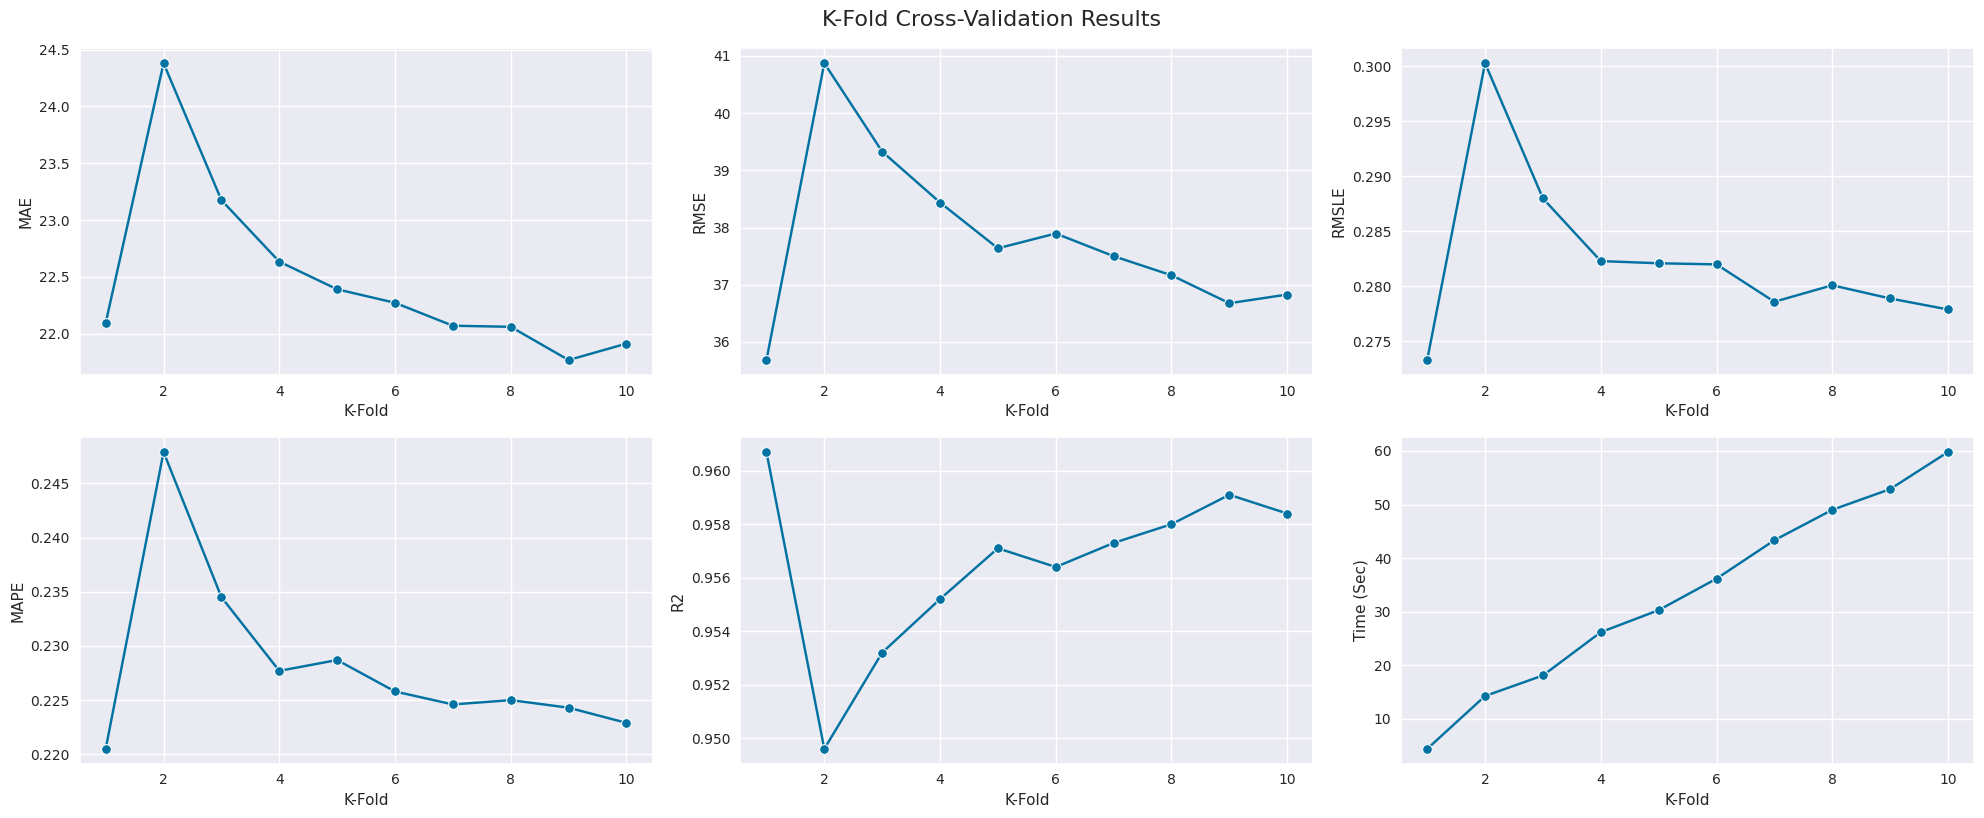

In [ ]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(2, 3, figsize =(20,8))
axs = axs.flatten()

metric_eval = ['MAE', 'RMSE', 'RMSLE', 'MAPE', 'R2', 'Time (Sec)']
for i in range(len(metric_eval)):
    sns.lineplot(data=cross_val, x='K-Fold', y=metric_eval[i], ax=axs[i], marker='o')

fig.tight_layout()
plt.suptitle('K-Fold Cross-Validation Results', y=1.02, fontsize=16)
plt.show()

`Insight`

- The errors in MAE, RMSE, RMSLE, MAPE with cross-validation tend to decrease as the k-fold value increases (2-10). This indicates that with higher k-fold, the model tends to provide more accurate predictions.

- The R2 (Coefficient of Determination) value also tends to increase from k=2 to k=10 (with cross-validation), indicating that the model is getting better at explaining the variability in the target data.

- The execution time increases as the k-fold value increases. This is reasonable because the higher the k-fold value, the more iterations are needed for cross-validation, which requires longer computation time.

- In this case, without cross validation (k=1) is the best result with MAE (22.27) MAPE (21.88%) with the shortest time (3.21 seconds) and R2 (0.96).

- There is no significant change between without using cross validation (k=1) or with cross validation from k=2 to k=10. This indicates stable model performance without samples or with different sample distributions.

In [ ]:
final_model = tuned_models['catboost']
final_model

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=<catboost.core.CatBoostRegressor object at 0x7fdefe462f50>)

### **Evaluate Final Model**

**Learning Curve**

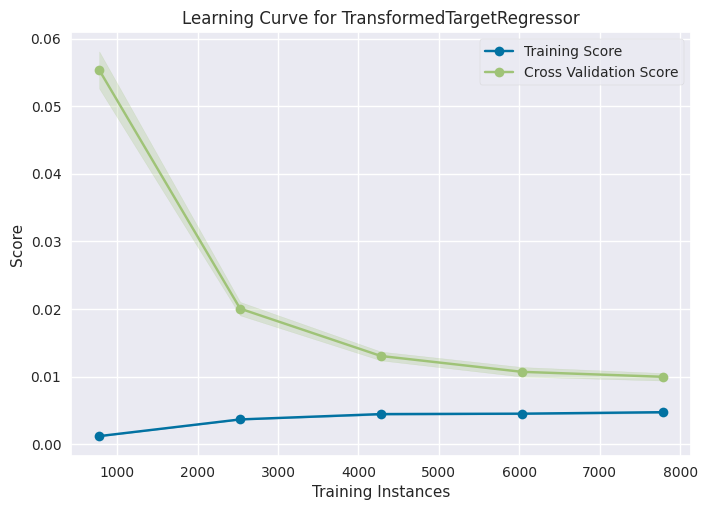

<Axes: title={'center': 'Learning Curve for TransformedTargetRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.metrics import mean_absolute_percentage_error, make_scorer

curve = LearningCurve(final_model, scoring=make_scorer(mean_absolute_percentage_error))
curve.fit(get_config('X'), get_config('y'))
curve.show()

`Insight`

- The learning curve for the **TransformedTargetRegressor** model shows a clear trend of improvement in cross-validation scores as the number of training instances increases. This suggests that the model benefits significantly from having more data during the training phase.  

- While the training score remains stable with a small gap compared to the cross-validation score, the validation score converges toward the training score as the number of training instances grows. This indicates that the model generalizes well and is neither underfitting nor overfitting.  

- The stability in training scores and the narrowing gap between training and cross-validation scores show that the model has effectively captured the patterns in the data, achieving good performance on unseen data.  

- After around 6000 training instances, the improvement in cross-validation scores plateaus, implying that adding more data beyond this point may lead to marginal gains.  

- Overall, the learning curve highlights the model's robustness and good generalization capabilities, confirming that it is well-suited for the task with the current dataset size.

**Residual Analysis**

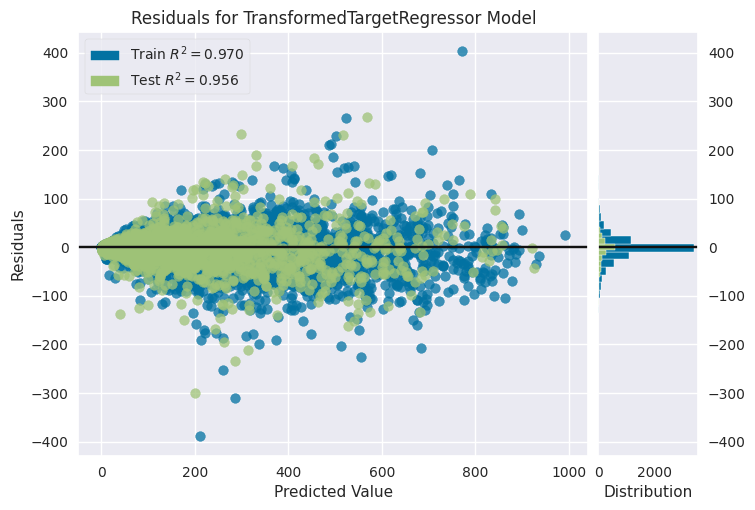

In [ ]:
plot_model(estimator=final_model, plot='residuals')

`Insight`

- The residuals clustering near the zero line indicate that the **TransformedTargetRegressor** model has made accurate predictions with relatively low error across both training and test datasets.  

- High R² values for both training (0.970) and test (0.956) data demonstrate that the model explains a significant proportion of the variance in the target variable, confirming its strong predictive ability.  

- The residual distribution appears approximately centered around zero, with no clear systematic patterns. This suggests that the model's errors are random and not influenced by any particular range of predicted values, which is desirable for reliable predictions.  

- The histogram on the right-hand side shows that the residuals follow an almost symmetric distribution, with most values concentrated near zero. This indicates the absence of severe bias in the model's predictions.  

- Overall, the graph illustrates that the **TransformedTargetRegressor** model achieves high accuracy, exhibits a well-behaved residual pattern, and generalizes effectively to unseen data.

**Data Validation Prediction**

In [ ]:
validation_prediction = predict_model(final_model)
validation_prediction['error'] = validation_prediction['prediction_label'] - validation_prediction['cnt']
validation_prediction['abs_error'] = validation_prediction['error'].abs()
validation_prediction['square_error'] = validation_prediction['error']**2
validation_prediction['percentage_error'] = validation_prediction['error'].abs()/validation_prediction['cnt']
df_residual = validation_prediction[['cnt', 'prediction_label', 'error', 'abs_error', 'square_error', 'percentage_error']]
df_residual.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,23.0707,1434.0296,37.8686,0.9557,0.2748,0.2218


,cnt,prediction_label,error,abs_error,square_error,percentage_error
945,99,86.794071,-12.205929,12.205929,148.984701,0.123292
3008,171,157.823407,-13.176593,13.176593,173.622591,0.077056
10473,245,271.578419,26.578419,26.578419,706.412336,0.108483
4269,557,507.543468,-49.456532,49.456532,2445.948508,0.088791
8090,95,100.709943,5.709943,5.709943,32.603453,0.060105


`Insight`

From the results above, the final model prediction performance on the validation data is consistent with the model's performance after tuning. The results show:  

- The **MAPE** decreased slightly from 22.81% to **22.18%**, indicating improved accuracy in percentage-based errors.  
- The **R² score** remained robust at **0.9557**, demonstrating strong predictive ability and consistency.  
- The **MAE** increased marginally from 22.7507 to **23.0707**, but this change is negligible and does not significantly affect the model's overall performance.  

The stability of these metrics confirms that the model is well-tuned, achieves reliable performance, and provides accurate predictions for the validation dataset.

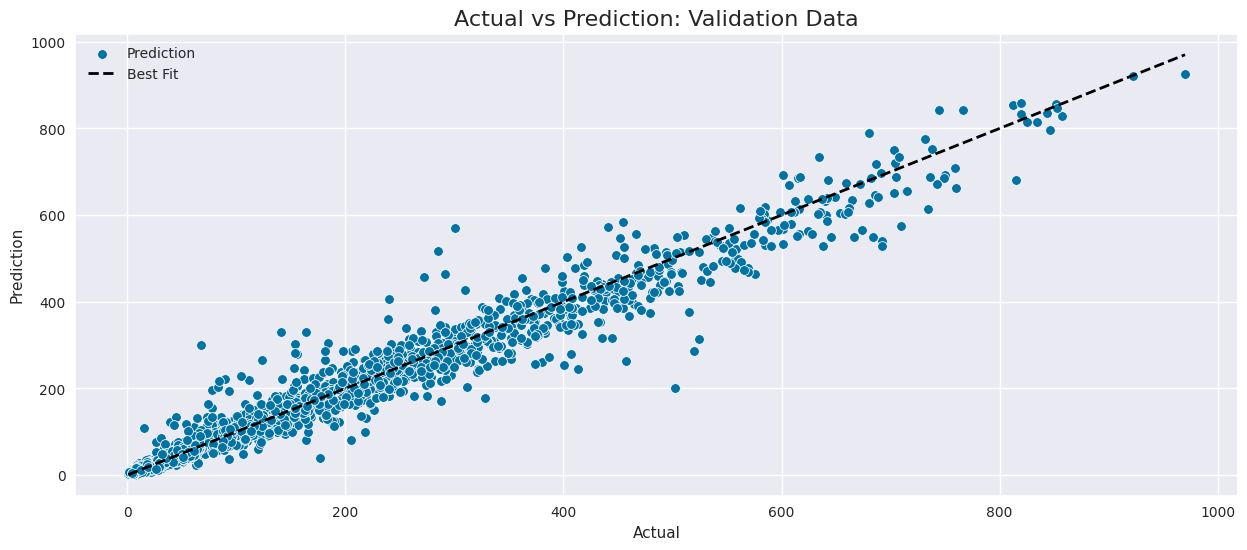

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=(15,6))
sns.scatterplot(data=validation_prediction, y='prediction_label', x='cnt', label='Prediction')
sns.regplot(data=validation_prediction, x='cnt', y='cnt', scatter=False, line_kws = {'linewidth': 2, 'linestyle':'--'}, color='black', label='Best Fit')

plt.title('Actual vs Prediction: Validation Data', fontsize=16)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.show()

`Insight`

- The predictions are generally accurate, as shown by the data points clustering close to the best-fit line (dashed line), which represents an ideal prediction. However, there are a few outliers where the predicted values deviate significantly from the actual values.  

- The alignment of most data points along the best-fit line indicates that the model captures the underlying patterns in the data effectively.  

- The presence of outliers suggests that the model struggles with certain cases, possibly due to inherent noise or patterns that the model has not fully learned.  

- With a Mean Absolute Percentage Error (MAPE) of approximately 22%, the model's errors are reasonable and within acceptable limits for practical use.  

- Overall, the model demonstrates strong predictive performance with most predictions aligning well with actual values and only minor instances of larger deviations.

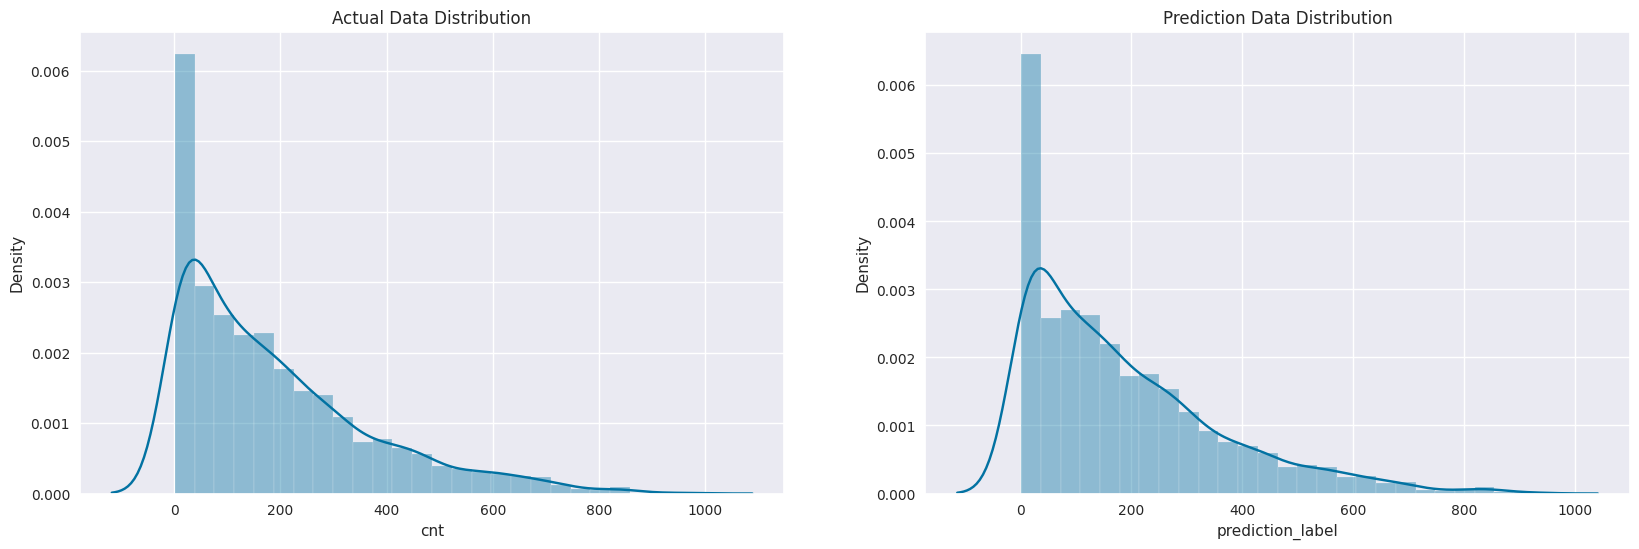

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))
sns.distplot(validation_prediction['cnt'], ax=axs[0])
sns.distplot(validation_prediction['prediction_label'], ax=axs[1])
axs[0].set_title('Actual Data Distribution')
axs[1].set_title('Prediction Data Distribution')
plt.show()

`Insight`

- Both the actual and predicted data distributions exhibit a similar overall pattern, with the majority of values concentrated at lower ranges. However, the predicted distribution shows a smoother shape with reduced peak sharpness and more spread-out values.

- The peak observed in the actual data is sharper and more prominent, suggesting a higher concentration of low values. In contrast, the prediction distribution exhibits a lower peak, indicating that the model slightly underestimates the frequency of these low values.

- The longer tails in the predicted distribution highlight that the model generates more dispersed predictions, which suggests a tendency to overestimate mid-to-high values compared to the actual data.

- This broader spread in predictions could indicate that the model lacks precision, especially for extreme values, resulting in higher variability in predictions compared to the actual distribution.

- Overall, while the model captures the general trend of the actual data, improvements are needed to reduce overestimation for mid-to-high values and to better align the sharpness of the peak for lower values.

In [ ]:
bins = [0, 50, 100, 200, 300, 400, 500, 600, float('inf')]
labels = ['0-50', '50-100', '101-200', '201-300', '301-400', '401-500', '501-600', '>600']

df_residual['cnt_bins'] = pd.cut(df_residual['cnt'], bins=bins, labels=labels, right=False)

residual_val = df_residual.groupby('cnt_bins').mean().reset_index()
residual_val

,cnt_bins,cnt,prediction_label,error,abs_error,square_error,percentage_error
0,0-50,18.175676,19.732705,1.557030,5.703117,117.804022,0.432542
1,50-100,73.815498,81.238165,7.422667,16.449259,833.685802,0.223590
2,101-200,147.077103,148.485701,1.408598,23.347838,1179.522654,0.161913
3,201-300,246.205387,243.780873,-2.424514,30.287695,1774.561592,0.123313
4,301-400,344.319527,334.851197,-9.468329,35.186266,2299.714876,0.102845
5,401-500,446.000000,424.529297,-21.470703,44.674215,3409.025677,0.101131
6,501-600,549.229508,510.327012,-38.902496,50.592959,5593.912998,0.093791
7,>600,697.555556,673.806520,-23.749036,49.819693,4042.495638,0.072545


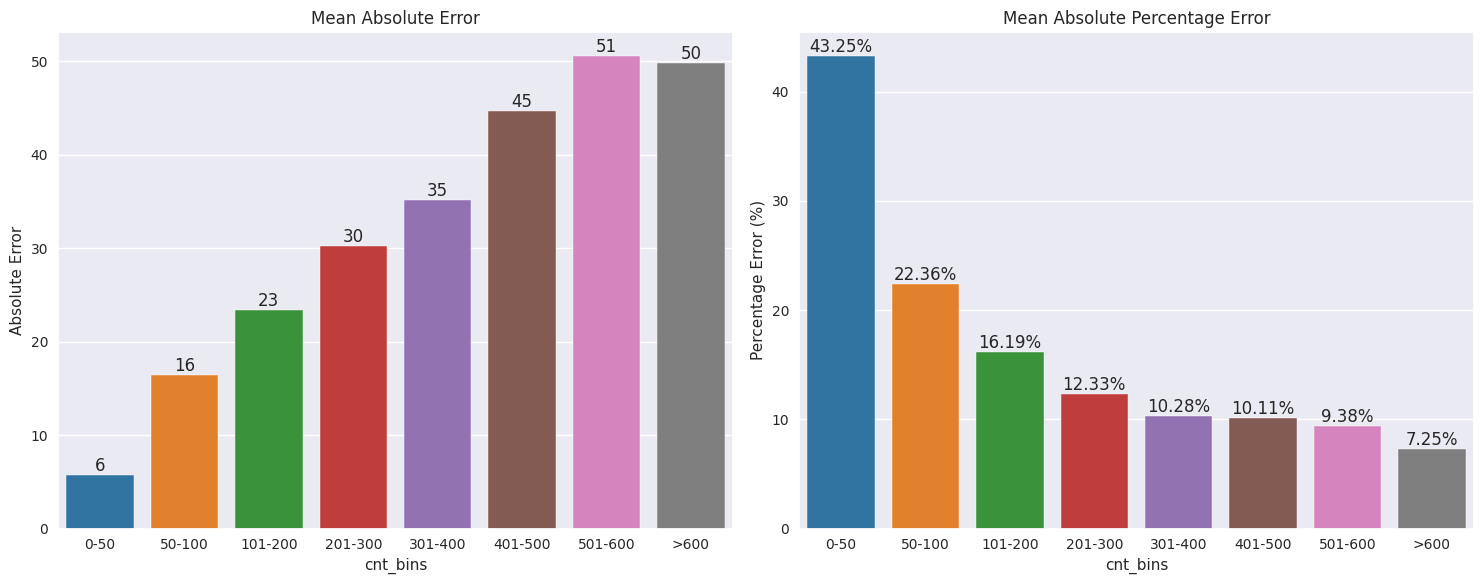

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

mae_bar=sns.barplot(x='cnt_bins', y='abs_error', data=residual_val, hue='cnt_bins', palette=color, ax=axs[0])
for idx, bar in enumerate(mae_bar.patches):
        x_value = bar.get_x() + bar.get_width() / 2
        y_value = bar.get_height()
        label = "{:.0f}".format(bar.get_height())
        axs[0].text(x_value, y_value, label, ha='center', va='bottom')

mape_bar=sns.barplot(x='cnt_bins', y=residual_val['percentage_error']*100, data=residual_val, hue='cnt_bins', palette=color, ax=axs[1])
for idx, bar in enumerate(mape_bar.patches):
        x_value = bar.get_x() + bar.get_width() / 2
        y_value = bar.get_height()
        label = "{:.2f}%".format(bar.get_height())
        axs[1].text(x_value, y_value, label, ha='center', va='bottom')

axs[0].set_title('Mean Absolute Error')
axs[0].set_xlabel('cnt_bins')
axs[0].set_ylabel('Absolute Error')
axs[1].set_title('Mean Absolute Percentage Error')
axs[1].set_xlabel('cnt_bins')
axs[1].set_ylabel('Percentage Error (%)')

plt.tight_layout()
plt.show()

`Insight`

- **Low Range (0-50):** The model is the least reliable in this range, with a high Mean Absolute Percentage Error (MAPE) of **43.25%**, indicating a significant percentage deviation despite the Mean Absolute Error (MAE) being relatively low at **6**. This suggests that small absolute deviations have a large impact on the percentage error due to the smaller scale of values.

- **Mid Ranges (50-100, 101-200, 201-300):** The model performs progressively better as the range increases. For the **50-100** and **101-200** bins, the MAPE reduces to **22.36%** and **16.19%**, respectively, while the MAE remains at acceptable levels of **16** and **23**. In the **201-300** range, the MAPE further improves to **12.33%**, with an MAE of **30**. This shows the model captures mid-range predictions reasonably well.

- **High Ranges (301-400, 401-500, 501-600, >600):** Although the MAE increases significantly for higher ranges (e.g., **35, 45, 51, and 50**, respectively), the MAPE values are consistently low, ranging between **10.28%** and **7.25%**. This indicates that the model is most reliable for larger values, as the percentage errors remain minimal despite larger absolute deviations.

- **Conclusion:** While the model struggles with small values due to high percentage errors, its performance improves with increasing value ranges, with the lowest MAPE observed in the **>600** range (7.25%). For smaller ranges, further refinement is needed to improve accuracy and reliability.

**Feature Importance**

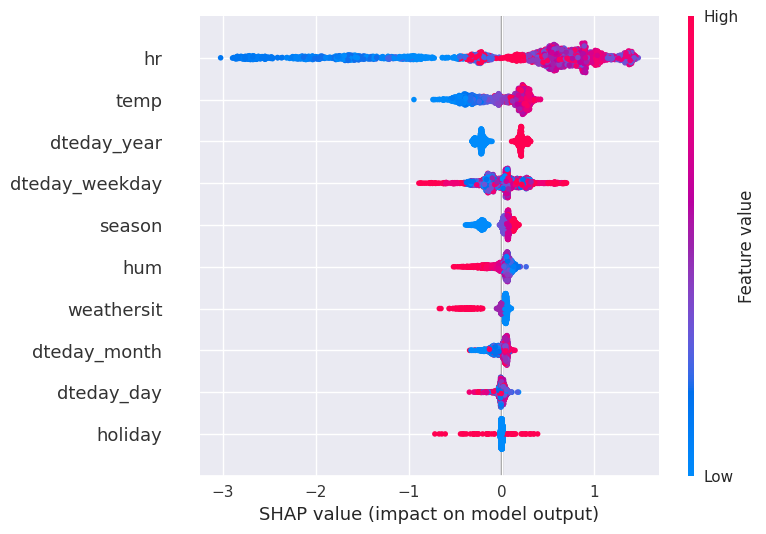

In [ ]:
interpret_model(final_model, plot='summary')

`Insight`

- **Key Influential Features:** The features with the largest impact on prediction results are **hr (hour), temp (temperature), dteday_year, dteday_weekday, season**, and **hum (humidity)**, as indicated by the range and spread of their SHAP values.

- **hr (hour):** High values of the `hr` feature (e.g., peak hours) have a significant positive impact on predictions, while low values (e.g., early hours) have a stronger negative impact.

- **temp (temperature):** Higher temperature values positively impact predictions, contributing significantly to increased predictions, whereas lower temperatures tend to have a mild negative impact.

- **dteday_year:** The year 2012 has a positive impact, while 2011 negatively influences the predictions.

- **Season and Humidity (hum):** High values of `season` and `hum` show mixed impacts. However, high humidity (hum) generally pushes predictions lower (negative impact), reflecting its stronger negative association.

- **weathersit:** High values of `weathersit` have a considerable negative impact, more so than high windspeed values.

- **dteday_weekday and dteday_month:** These features exhibit smaller but consistent impacts across the SHAP values, where low values of `month` tend to align with a negative influence.

- **Holiday:** The `holiday` feature shows minimal impact overall, with low and high values of this feature contributing near-zero SHAP values.


### Finalize Model

In [ ]:
catboost_final_model = finalize_model(final_model)
catboost_final_model

Pipeline(memory=Memory(location=None),
         steps=[('extract date',
                 TransformerWrapper(transformer=TransformerWrapper(include=['dteday'],
                                                                   transformer=ExtractDateTimeFeatures(features=['day',
                                                                                                                 'month',
                                                                                                                 'year',
                                                                                                                 'weekday'])))),
                ('selection',
                 TransformerWrapper(transformer=ColumnSelector(cols=['dteday_day',
                                                                     'dteday_month',
                                                                     'dteday_year',
                                                                     'dteday_weekday',
                                                                     'hr',
                                                                     'holiday',
                                                                     'season',
                                                                     'weathersit',
                                                                     'hum',
                                                                     'temp']))),
                ('outlier handling',
                 TransformerWrapper(transformer=TransformerWrapper(include=['weathersit',
                                                                            'hum'],
                                                                   transformer=HandlingOutliers()))),
                ('actual_estimator',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=<catboost.core.CatBoostRegressor object at 0x7fded4cf7d30>))])

The following is the work process end to end on the model based on the pipeline above:

1. `Outlier handling`: Resolve outliers in certain features (weathersit, hum, windspeed).

2. `Date Extraction (feature creation)`: create new features such as 'day', 'month', 'year', and 'weekday' extracted from the 'dteday' column.

3. `Feature selection before modeling (filter method)`: feature selection by removing features that may cause multicollinearity or redundancy, in this case the features 'atemp', 'casual', 'registered'.

4. `Modeling-Target Transformation`: since the target is significantly skewed, to improve the model performance results, the target needs to be transformed using a logarithmic function during training and transformed back using an exponential function during prediction.

5. `Modeling-Feature Selection during modeling (wrapper method)`: based on feature selection with squential feature selection and rfe some features are not significant to model performance so they need to be removed. to improve model performance and more efficient computation. in this case the features 'hum' and 'windspeed' are removed.

6. `Modeling-Prediction with CatBoost Regressor`: Using CatBoost Regressor to predict the target.

CatBoost employs the Boosting technique in its training process. Boosting is an ensemble learning method where weak models are sequentially adjusted to the data, and each subsequent model aims to correct the errors produced by the previous model. This process allows CatBoost to generate a strong and accurate model by focusing on addressing the aggregate errors of the preceding models. With this approach, CatBoost can effectively handle categorical data and deliver reliable prediction results across various machine learning tasks, such as classification and regression.

**Predicting Unseen Data (Data Testing)**

In [ ]:
predictions_unseen = predict_model(catboost_final_model, data=df_unseen)

predictions_unseen['error'] = predictions_unseen['prediction_label'] - predictions_unseen['cnt']
predictions_unseen['abs_error'] = predictions_unseen['error'].abs()
predictions_unseen['square_error'] = predictions_unseen['error']**2
predictions_unseen['percentage_error'] = predictions_unseen['error'].abs()/predictions_unseen['cnt']
predictions_unseen = predictions_unseen[['cnt', 'prediction_label', 'error', 'abs_error', 'square_error', 'percentage_error']]
predictions_unseen.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,20.9802,1235.0449,35.1432,0.9616,0.2736,0.2229


,cnt,prediction_label,error,abs_error,square_error,percentage_error
10417,140,153.423592,13.423592,13.423592,180.192833,0.095883
12030,445,381.258822,-63.741178,63.741178,4062.937809,0.143239
8646,30,19.754169,-10.245831,10.245831,104.977059,0.341528
6596,89,111.785944,22.785944,22.785944,519.199259,0.256022
6691,27,20.592510,-6.407490,6.407490,41.055934,0.237314


`Insight`

- The CatBoost Regressor model demonstrates strong performance on the unseen test data.

- The high \( R^2 \) value (0.9616) indicates that the model effectively explains a significant portion of the variation in the target variable.

- The Mean Absolute Error (MAE) of 20.98 and Mean Absolute Percentage Error (MAPE) of 22.29% show that the model's predictions are reasonably accurate and consistent across most cases.

- However, specific instances, such as errors of -63.74 (14.32% relative error) and 22.79 (25.60% relative error), highlight areas where the model struggles to capture certain patterns or outliers in the data.

- Overall, the model provides reliable and robust predictions with acceptable levels of error, making it suitable for practical applications.

**Advanced Analysis**

Can the model predict specific demand for casual or registered? Let's see..

In [ ]:
registered = RegressionExperiment()
registered.setup(
    target = 'registered',
    **configs
)

casual = RegressionExperiment()
casual.setup(
    target = 'casual',

    **configs
)

,Description,Value
0,Session id,42
1,Target,registered
2,Target type,Regression
3,Original data shape,"(9732, 11)"
4,Transformed data shape,"(9732, 11)"
5,Transformed train set shape,"(7785, 11)"
6,Transformed test set shape,"(1947, 11)"
7,Numeric features,9
8,Date features,1


,Description,Value
0,Session id,42
1,Target,casual
2,Target type,Regression
3,Original data shape,"(9732, 11)"
4,Transformed data shape,"(9732, 11)"
5,Transformed train set shape,"(7785, 11)"
6,Transformed test set shape,"(1947, 11)"
7,Numeric features,9
8,Date features,1


With the same setup and pipeline, I conducted experiments to test the model against other target variables, namely 'casual' and 'registered'.

In [ ]:
print('Registered Member Prediction:')
registered_model = registered.create_model(catboost_final_model, verbose=False)
display(registered.predict_model(registered_model, data=df_unseen).head()[['registered', 'prediction_label']])

print('Casual Member Prediction:')
casual_model = casual.create_model(catboost_final_model, verbose=False)
display(casual.predict_model(casual_model, data=df_unseen).head()[['casual', 'prediction_label']])

Registered Member Prediction:


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,17.2709,856.7939,29.2710,0.9614,0.2865,0.2325


,registered,prediction_label
10417,107,127.102321
12030,344,299.304862
8646,19,15.325491
6596,62,80.426648
6691,25,20.734107


Casual Member Prediction:


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,7.7143,188.1530,13.7169,0.9226,0.4766,0.4089


,casual,prediction_label
10417,33,37.433615
12030,101,83.484538
8646,11,4.480155
6596,27,25.052152
6691,2,1.195057


`Insight`

- For **registered members**, the final CatBoost Regressor model achieves strong predictive performance with low error metrics: MAE of 17.27, MAPE of 23.25%, and an \( R^2 \) value of 96.14%. This demonstrates that the model effectively captures the variations in the data for registered members.

- For **casual members**, the model performs well with an MAE of 7.71 and an \( R^2 \) value of 92.26%. However, the MAPE of 40.89% indicates higher relative errors due to the smaller range of values (1–50) and the influence of predictions near zero. Despite this, the MAE of 7.71 suggests the predictions are practically reasonable.

- For example, the model predicts an average demand of **35 casual members per hour**, with an error rate of approximately **22.28%** (MAPE). This translates to an allocation requirement of around **43 bicycles** (35 predicted + 8 error margin).

- This analysis highlights that while there are some inaccuracies in predictions for casual users, the model's performance is sufficient for practical applications, such as optimizing bicycle allocation and estimating revenue. The profit margin remains positive despite prediction errors.

# **Conclusion and Recommendation**

`Modeling Process`

- **Primary Model Choice**: CatBoost should be the primary model for predicting bike rental demand due to its superior predictive accuracy, handling of non-linear relationships, and stable performance across different evaluation metrics.

- **Hyperparameter Tuning**: Hyperparameter tuning significantly improves CatBoost’s performance. It is recommended to continue using the tuned parameters (iterations=1400, learning_rate=0.06, depth=8) for optimal results.

- **Model Efficiency**: While CatBoost is the top performer, LightGBM is a strong alternative if faster training times are required, especially in real-time applications. Its speed makes it ideal for iterative tuning or time-sensitive predictions.

- **Avoid Linear Models**: Linear models should be avoided for this problem, as they fail to capture the non-linear relationships present in the dataset. They should only be considered for simpler baseline comparisons.

- **Further Model Refinements**: Additional improvements in model performance can be achieved by exploring more advanced techniques such as ensemble methods or fine-tuning hyperparameters further to address potential areas for prediction error reduction.

`Model Evaluation`

- **Learning Curve**: The TransformedTargetRegressor benefits from more training data, with steady improvements seen in cross-validation scores. After ~6000 instances, additional data shows limited gains, indicating good performance for the current dataset size.

- **Residuals & Generalization**: Residuals are centered around zero with no clear patterns, confirming good prediction accuracy and minimal bias. High R² values (0.970 for training and 0.956 for test) indicate strong predictive ability and generalization to unseen data.

- **Prediction Accuracy**: The model’s predictions are generally accurate with minor deviations (MAPE of 22%), with outliers attributed to noise or unlearned patterns. Overall, the model performs well with some room for improvement in handling outliers.

- **Performance by Range**: The model struggles with small values (MAPE of 43.25%) but performs progressively better with higher value ranges, achieving MAPE as low as 7.25% for larger values (301-600+).

- **Feature Impacts**:
  - **hr (hour)**: Peak hours positively influence predictions, while early hours have a negative effect.
  - **temp (temperature)**: Higher temperatures increase predictions, while lower temperatures decrease them.
  - **dteday_year**: 2012 positively impacts predictions, while 2011 has a negative effect.
  - **season & hum (humidity)**: High humidity generally reduces predictions.
  - **weathersit**: High values negatively affect predictions.
  - **dteday_weekday & dteday_month**: These have smaller, consistent impacts, with lower months showing a negative effect.
  - **Holiday**: Has minimal impact on predictions.



**Business Impact**

- Accurate demand predictions enable companies to optimize bicycle allocation, ensuring availability matches user demand. This helps reduce the risk of over or under-allocating resources, which can lead to unnecessary operating costs or lost revenue opportunities.

- For instance, consistent allocation based on static forecasts can result in excess bikes during low-demand periods (overestimating demand), leading to increased operational costs. Alternatively, underestimating demand during peak times can result in missed revenue opportunities as bikes become unavailable.

- Demand prediction insights can be leveraged to design targeted marketing campaigns. Promotions or special offers can be scheduled for periods of high demand, such as weekends or holidays, improving customer satisfaction and increasing sales.

**Recommendation**

- To address limitations in predicting small demand values (1-50), consider fine-tuning the model specifically for this range. This could include targeted feature engineering, adjusting hyperparameters, or experimenting with alternative models better suited for low-demand scenarios.

- Reevaluate the metrics used for model evaluation to ensure they align with business objectives. While MAPE is useful for larger demand values, combining it with MAE for smaller ranges (1-50) may offer a better balance in accuracy across the entire range of demand.

- Conduct further analysis to identify the causes of significant prediction errors. Investigate whether external factors, changes in user behavior, or policy adjustments are influencing demand patterns, and ensure these factors are accounted for in the model.

# **Deployment**

**Save and Export Model**

In [ ]:
import pickle
import os

# Specify the directory
directory = "../model/"

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Specify the file path
filename = os.path.join(directory, "CatBoostFinalModel.pkl")  # Add a file extension for clarity

# Save the CatBoost model
with open(filename, 'wb') as file:
    pickle.dump(catboost_final_model, file)

print(f"Model saved to {filename}")


Model saved to ../model/CatBoostFinalModel.pkl


In [ ]:
from google.colab import files

# Download the file
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Try to Load Model**

In [ ]:
model = pickle.load(open('../model/CatBoostFinalModel.pkl', 'rb'))
model

Pipeline(memory=Memory(location=None),
         steps=[('extract date',
                 TransformerWrapper(transformer=TransformerWrapper(include=['dteday'],
                                                                   transformer=ExtractDateTimeFeatures(features=['day',
                                                                                                                 'month',
                                                                                                                 'year',
                                                                                                                 'weekday'])))),
                ('selection',
                 TransformerWrapper(transformer=ColumnSelector(cols=['dteday_day',
                                                                     'dteday_month',
                                                                     'dteday_year',
                                                                     'dteday_weekday',
                                                                     'hr',
                                                                     'holiday',
                                                                     'season',
                                                                     'weathersit',
                                                                     'hum',
                                                                     'temp']))),
                ('outlier handling',
                 TransformerWrapper(transformer=TransformerWrapper(include=['weathersit',
                                                                            'hum'],
                                                                   transformer=HandlingOutliers()))),
                ('actual_estimator',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=<catboost.core.CatBoostRegressor object at 0x7fdf21417880>))])

Model is successfully loaded.

**Try to Predict Unseen Data**

In [ ]:
predict_model(model, df_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,20.9802,1235.0449,35.1432,0.9616,0.2736,0.2229


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,prediction_label
10417,2011-07-06,0.70,2,0,3,0.6970,0.74,13,33,107,140,153.423592
12030,2012-08-07,0.66,3,0,3,0.7273,0.76,16,101,344,445,381.258822
8646,2012-06-26,0.35,1,0,3,0.6212,0.60,1,11,19,30,19.754169
6596,2011-03-05,0.67,2,0,1,0.4545,0.46,19,27,62,89,111.785944
6691,2011-05-26,0.88,2,0,2,0.5455,0.60,5,2,25,27,20.592510
...,...,...,...,...,...,...,...,...,...,...,...,...
8030,2011-08-18,0.46,1,0,3,0.7273,0.80,16,49,196,245,270.551419
3106,2012-10-17,0.76,1,0,4,0.3939,0.38,1,3,14,17,20.775396
7534,2011-03-04,0.52,1,0,1,0.2727,0.28,11,16,73,89,75.834682
5021,2012-03-21,0.83,2,0,2,0.5000,0.52,10,30,124,154,191.673186


Model successfuly predicted the data.